# README



To see the results for two-cluster clustering and classification, run all cells in the following sections:
1, 2.1, 2.2, 3.1, 4.1, 5.1, 6.1, and 7.1

To see the results for Three-cluster clustering and classification, run all cells the following sections:
1, 2.1, 2.3, 3.2, 4.2, 5.2, 6.2, and 7.2

To see the results for Six-cluster clustering and classification, run all cells the following sections:
1, 2.1, 2.4, 3.3, 4.3, 5.3, 6.3, and 7.3

#1: Visulisation and data preprocessing

In [160]:
# 2-1   -> This shows the cell number

import pandas as pd
import numpy as np

In [161]:
# 2

#### To analyse the year 2021-2022  ###########
#### Replace the vaccination data to analyse other years
clustering_data=pd.read_csv("/content/Vacstat2021-22.csv")
demographic_data=pd.read_csv("/content/GDSC.csv")

In [162]:
# 3

# Rename columns to meaningful names
demographic_data.rename(columns={
    'IMD - Proportion of LSOAs in most deprived 10% nationally ': 'IMD-Proportion Deprived',
    'Proficiency in English language: Main language is not English': 'English Proficiency',
    '% Ethnic minority': 'Ethnic Minority'
}, inplace=True)

In [163]:
# 4 (optional) -> optional cells are for visualisation purposes. You can skip them

demographic_data

,OrgCode,OrgName,IMD - Average score,IMD-Proportion Deprived,Born outside UK,No qualifications,Routine occupations,Long-term unemployed,Rurality,English Proficiency,Ethnic Minority
0,E06000001,Hartlepool,35.037,0.3621,0.039650,0.231449,0.157165,0.141004,3,0.020980,0.035413
1,E06000002,Middlesbrough,40.460,0.4884,0.122881,0.239444,0.150608,0.153241,3,0.075718,0.176311
2,E06000003,Redcar and Cleveland,29.792,0.2386,0.029144,0.220149,0.149438,0.123819,4,0.010991,0.023013
3,E06000004,Stockton-on-Tees,25.790,0.2083,0.062397,0.186324,0.141004,0.113626,3,0.029750,0.079637
4,E06000005,Darlington,25.657,0.1846,0.078164,0.192629,0.152080,0.102060,3,0.042083,0.056319
...,...,...,...,...,...,...,...,...,...,...,...
145,E10000030,Surrey,10.087,0.0000,0.179225,0.128561,0.067494,0.054904,1,0.069352,0.145016
146,E10000031,Warwickshire,15.640,0.0177,0.125152,0.168685,0.127284,0.063482,4,0.069296,0.109085
147,E10000032,West Sussex,14.429,0.0099,0.129064,0.157601,0.095401,0.060295,3,0.058180,0.089676
148,E10000034,Worcestershire,18.089,0.0495,0.080332,0.180093,0.119641,0.065772,4,0.043612,0.061609


In [164]:
# 5

# Strip leading and trailing spaces from column names
demographic_data.columns = demographic_data.columns.str.strip()

# Verify the cleaned column names
print(demographic_data.columns)

Index(['OrgCode', 'OrgName', 'IMD - Average score', 'IMD-Proportion Deprived',
       'Born outside UK', 'No qualifications', 'Routine occupations',
       'Long-term unemployed', 'Rurality', 'English Proficiency',
       'Ethnic Minority'],
      dtype='object')


In [165]:
# 6

################## 2021-2022 ########################
clustering_data_original=clustering_data.copy()
clustering_data

,OrgCode,OrgName,DTaP_IPV_5y,DTaP_IPV_Hib_5y,DTaP_IPV_Hib_HepB_12m,DTaP_IPV_Hib_HepB_24m,Hib_MenC_24m,Hib_MenC_5y,MenB_12m,MenB_booster_24m,MMR_24m,MMR1_5y,MMR2_5y,PCV_12m,PCV_24m,Rota_12m
0,E06000001,Hartlepool,84.9,96.1,93.2,96.5,92.6,92.9,93.8,92.6,92.4,95.3,86.8,97.2,92.6,92.6
1,E06000002,Middlesbrough,81.8,92.4,90.2,90.7,87.5,88.2,89.5,85.8,87.9,91.8,84.0,93.3,87.5,87.9
2,E06000003,Redcar and Cleveland,89.8,97.4,95.4,95.5,93.3,95.2,96.2,92.7,93.2,97.0,92.8,97.2,93.3,93.1
3,E06000004,Stockton-on-Tees,89.3,97.3,96.0,96.0,95.4,95.0,96.4,94.4,95.6,97.2,92.5,97.8,95.4,95.1
4,E06000005,Darlington,90.3,96.9,95.0,95.1,93.1,93.7,94.2,93.0,93.1,94.9,90.3,96.3,93.2,93.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,E10000029,Suffolk,90.1,95.3,95.0,96.2,93.6,92.4,94.6,93.0,93.6,94.7,90.8,96.1,93.5,93.3
145,E10000030,Surrey,83.3,92.3,92.3,92.2,89.0,91.1,92.2,87.4,89.4,93.9,83.9,94.3,88.7,90.8
146,E10000031,Warwickshire,89.4,96.7,95.0,95.5,92.2,94.7,94.6,91.3,92.9,96.0,90.5,95.7,92.2,93.9
147,E10000032,West Sussex,89.8,95.8,95.0,95.3,93.2,93.2,94.8,92.7,93.2,95.3,91.4,96.1,93.2,93.3


# 2. Clustering

#### 2.1. Dendrogram

In [166]:
# 7

cluster_names=clustering_data[['OrgCode','OrgName']]
clustering_data.drop(['OrgCode','OrgName'],axis=1,inplace=True, errors='ignore')

In [167]:
# 8 (optional)

print(clustering_data.isnull().sum())  # Check for NaN values

DTaP_IPV_5y              0
DTaP_IPV_Hib_5y          0
DTaP_IPV_Hib_HepB_12m    0
DTaP_IPV_Hib_HepB_24m    0
Hib_MenC_24m             0
Hib_MenC_5y              0
MenB_12m                 0
MenB_booster_24m         0
MMR_24m                  0
MMR1_5y                  0
MMR2_5y                  0
PCV_12m                  0
PCV_24m                  0
Rota_12m                 0
dtype: int64


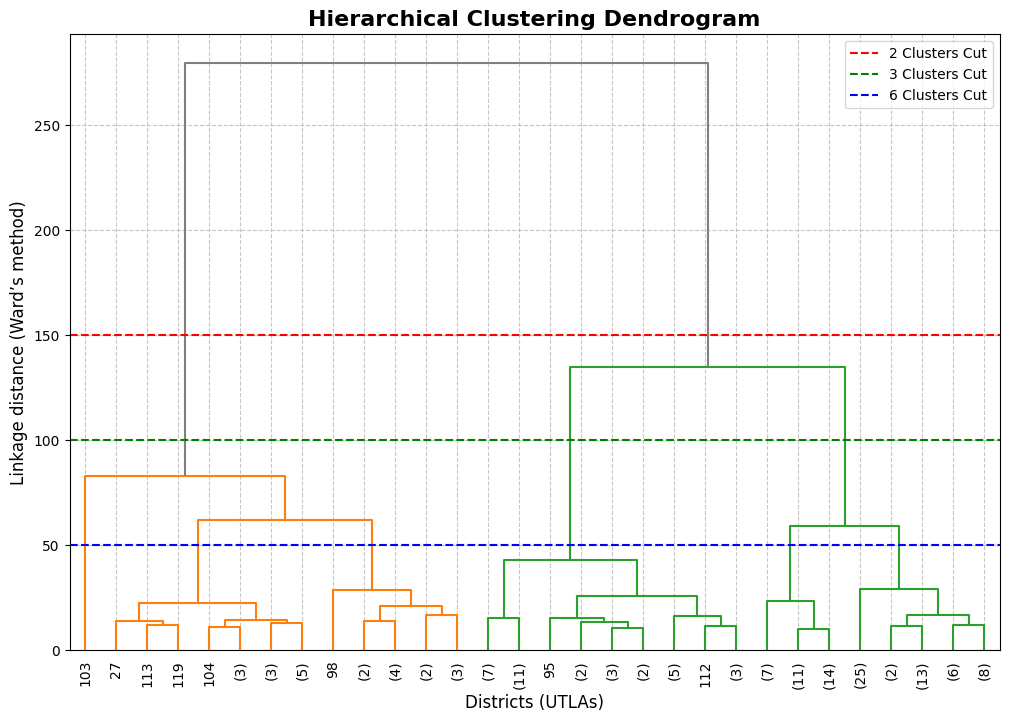

In [168]:
# 9

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering using the Ward method
linkage_matrix = linkage(clustering_data, method='ward')

# Create a dendrogram
plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # Optional: truncate to show last p merged clusters
    p=30,  # Show the last 30 merged clusters
    show_leaf_counts=True,  # Show the number of points in each cluster
    leaf_rotation=90.,  # Rotate labels for better readability
    leaf_font_size=10.,  # Font size for leaf labels
    above_threshold_color='grey',  # Colour for non-clustered branches
)

# Add title and axis labels
plt.title("Hierarchical Clustering Dendrogram", fontsize=16, fontweight='bold')
plt.xlabel("Districts (UTLAs)", fontsize=12)
plt.ylabel("Linkage distance (Ward’s method)", fontsize=12)

# Add horizontal lines to indicate cluster cutoffs (optional)
plt.axhline(y=150, color='r', linestyle='--', linewidth=1.5, label='2 Clusters Cut')
plt.axhline(y=100, color='g', linestyle='--', linewidth=1.5, label='3 Clusters Cut')
plt.axhline(y=50, color='b', linestyle='--', linewidth=1.5, label='6 Clusters Cut')

# Add legend to describe the cluster cutoffs
plt.legend(fontsize=10, loc='upper right')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Save the figure as a high-resolution image
plt.savefig("dendrogram_with_cutoffs.png", dpi=300, bbox_inches='tight')

# Display the dendrogram
plt.show()


### 2.2. Fit Agglomerative Clustering (2 Clusters)

In [74]:
# 10

from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward') # if this give you an error, replace metric with "affinity"
cluster_ids=cluster.fit_predict(clustering_data)

In [75]:
# 11

cluster_ids.shape
cluster_ids=pd.DataFrame(cluster_ids,columns=['cluster'])

In [76]:
# 12

clusters=pd.concat([cluster_names,cluster_ids],axis=1)

In [77]:
# 13 (optional)
clusters.tail(30)

,OrgCode,OrgName,cluster
119,E09000028,Southwark,1
120,E09000029,Sutton,0
121,E09000030,Tower Hamlets,1
122,E09000031,Waltham Forest,1
123,E09000032,Wandsworth,1
124,E09000033,Westminster,1
125,E10000003,Cambridgeshire,0
126,E10000006,Cumbria,0
127,E10000007,Derbyshire,0
128,E10000008,Devon,0


In [78]:
# 14 (optional)

## Checking the number of districts in each cluster

counts = cluster_ids['cluster'].value_counts()
print(counts)

cluster
0    121
1     28
Name: count, dtype: int64


In [15]:
# 15

clustering_data['cluster']=cluster_ids
# clustering_data_original['cluster']=cluster_ids
# clustering_data

In [16]:
# 16 (optional)

clustering_data

,DTaP_IPV_5y,DTaP_IPV_Hib_5y,DTaP_IPV_Hib_HepB_12m,DTaP_IPV_Hib_HepB_24m,Hib_MenC_24m,Hib_MenC_5y,MenB_12m,MenB_booster_24m,MMR_24m,MMR1_5y,MMR2_5y,PCV_12m,PCV_24m,Rota_12m,cluster
0,84.9,96.1,93.2,96.5,92.6,92.9,93.8,92.6,92.4,95.3,86.8,97.2,92.6,92.6,0
1,81.8,92.4,90.2,90.7,87.5,88.2,89.5,85.8,87.9,91.8,84.0,93.3,87.5,87.9,0
2,89.8,97.4,95.4,95.5,93.3,95.2,96.2,92.7,93.2,97.0,92.8,97.2,93.3,93.1,0
3,89.3,97.3,96.0,96.0,95.4,95.0,96.4,94.4,95.6,97.2,92.5,97.8,95.4,95.1,0
4,90.3,96.9,95.0,95.1,93.1,93.7,94.2,93.0,93.1,94.9,90.3,96.3,93.2,93.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,90.1,95.3,95.0,96.2,93.6,92.4,94.6,93.0,93.6,94.7,90.8,96.1,93.5,93.3,0
145,83.3,92.3,92.3,92.2,89.0,91.1,92.2,87.4,89.4,93.9,83.9,94.3,88.7,90.8,0
146,89.4,96.7,95.0,95.5,92.2,94.7,94.6,91.3,92.9,96.0,90.5,95.7,92.2,93.9,0
147,89.8,95.8,95.0,95.3,93.2,93.2,94.8,92.7,93.2,95.3,91.4,96.1,93.2,93.3,0


* Average Vaccination Rate in Each Cluster

In [17]:
hierarchichal_cluster=pd.DataFrame(round(clustering_data.groupby('cluster').mean(),2))
hierarchichal_cluster

,DTaP_IPV_5y,DTaP_IPV_Hib_5y,DTaP_IPV_Hib_HepB_12m,DTaP_IPV_Hib_HepB_24m,Hib_MenC_24m,Hib_MenC_5y,MenB_12m,MenB_booster_24m,MMR_24m,MMR1_5y,MMR2_5y,PCV_12m,PCV_24m,Rota_12m
cluster,,,,,,,,,,,,,,
0,87.30,95.53,93.38,94.50,91.30,93.27,93.09,90.44,91.48,94.80,88.51,95.20,91.68,91.54
1,69.86,89.28,85.21,86.33,78.75,84.59,84.76,76.76,78.98,87.06,72.64,87.65,79.36,82.94


### 2.3. Fit Agglomerative Clustering (3 Clusters)

In [117]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward') # if this give you an error, replace metric with "affinity"
cluster_ids3=cluster.fit_predict(clustering_data)

In [118]:
cluster_ids3.shape
cluster_ids3=pd.DataFrame(cluster_ids3,columns=['cluster2'])

In [119]:
cluster_ids3

,cluster2
0,1
1,2
2,1
3,1
4,1
...,...
144,1
145,2
146,1
147,1


In [120]:
clustering_data['cluster2']=cluster_ids3
# clustering_data_original['cluster2']=cluster_ids3
# clustering_data

In [121]:
clustering_data

,DTaP_IPV_5y,DTaP_IPV_Hib_5y,DTaP_IPV_Hib_HepB_12m,DTaP_IPV_Hib_HepB_24m,Hib_MenC_24m,Hib_MenC_5y,MenB_12m,MenB_booster_24m,MMR_24m,MMR1_5y,MMR2_5y,PCV_12m,PCV_24m,Rota_12m,cluster2
0,84.9,96.1,93.2,96.5,92.6,92.9,93.8,92.6,92.4,95.3,86.8,97.2,92.6,92.6,1
1,81.8,92.4,90.2,90.7,87.5,88.2,89.5,85.8,87.9,91.8,84.0,93.3,87.5,87.9,2
2,89.8,97.4,95.4,95.5,93.3,95.2,96.2,92.7,93.2,97.0,92.8,97.2,93.3,93.1,1
3,89.3,97.3,96.0,96.0,95.4,95.0,96.4,94.4,95.6,97.2,92.5,97.8,95.4,95.1,1
4,90.3,96.9,95.0,95.1,93.1,93.7,94.2,93.0,93.1,94.9,90.3,96.3,93.2,93.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,90.1,95.3,95.0,96.2,93.6,92.4,94.6,93.0,93.6,94.7,90.8,96.1,93.5,93.3,1
145,83.3,92.3,92.3,92.2,89.0,91.1,92.2,87.4,89.4,93.9,83.9,94.3,88.7,90.8,2
146,89.4,96.7,95.0,95.5,92.2,94.7,94.6,91.3,92.9,96.0,90.5,95.7,92.2,93.9,1
147,89.8,95.8,95.0,95.3,93.2,93.2,94.8,92.7,93.2,95.3,91.4,96.1,93.2,93.3,1


* Average Vaccination Rate in Each Cluster

In [122]:
hierarchichal_cluster2=pd.DataFrame(round(clustering_data.groupby('cluster2').mean(),2))
hierarchichal_cluster2

,DTaP_IPV_5y,DTaP_IPV_Hib_5y,DTaP_IPV_Hib_HepB_12m,DTaP_IPV_Hib_HepB_24m,Hib_MenC_24m,Hib_MenC_5y,MenB_12m,MenB_booster_24m,MMR_24m,MMR1_5y,MMR2_5y,PCV_12m,PCV_24m,Rota_12m
cluster2,,,,,,,,,,,,,,
0,69.86,89.28,85.21,86.33,78.75,84.59,84.76,76.76,78.98,87.06,72.64,87.65,79.36,82.94
1,89.54,96.34,94.44,95.54,93.03,94.48,94.25,92.39,93.19,95.71,90.67,96.03,93.29,92.78
2,81.79,93.55,90.78,91.95,87.05,90.30,90.25,85.66,87.30,92.56,83.23,93.16,87.75,88.48


### 2.4. Fit Agglomerative Clustering (6 Clusters)

In [169]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=6,metric='euclidean',linkage='ward') # if this give you an error, replace metric with "affinity"
cluster_ids6=cluster.fit_predict(clustering_data)

In [170]:
cluster_ids6.shape
cluster_ids6=pd.DataFrame(cluster_ids6,columns=['cluster3'])

In [93]:
cluster_ids6

,cluster3
0,2
1,0
2,5
3,5
4,2
...,...
144,2
145,0
146,2
147,2


In [172]:
clustering_data['cluster3']=cluster_ids6
# clustering_data_original['cluster3']=cluster_ids6
# clustering_data

In [173]:
clustering_data

,DTaP_IPV_5y,DTaP_IPV_Hib_5y,DTaP_IPV_Hib_HepB_12m,DTaP_IPV_Hib_HepB_24m,Hib_MenC_24m,Hib_MenC_5y,MenB_12m,MenB_booster_24m,MMR_24m,MMR1_5y,MMR2_5y,PCV_12m,PCV_24m,Rota_12m,cluster3
0,84.9,96.1,93.2,96.5,92.6,92.9,93.8,92.6,92.4,95.3,86.8,97.2,92.6,92.6,2
1,81.8,92.4,90.2,90.7,87.5,88.2,89.5,85.8,87.9,91.8,84.0,93.3,87.5,87.9,0
2,89.8,97.4,95.4,95.5,93.3,95.2,96.2,92.7,93.2,97.0,92.8,97.2,93.3,93.1,5
3,89.3,97.3,96.0,96.0,95.4,95.0,96.4,94.4,95.6,97.2,92.5,97.8,95.4,95.1,5
4,90.3,96.9,95.0,95.1,93.1,93.7,94.2,93.0,93.1,94.9,90.3,96.3,93.2,93.3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,90.1,95.3,95.0,96.2,93.6,92.4,94.6,93.0,93.6,94.7,90.8,96.1,93.5,93.3,2
145,83.3,92.3,92.3,92.2,89.0,91.1,92.2,87.4,89.4,93.9,83.9,94.3,88.7,90.8,0
146,89.4,96.7,95.0,95.5,92.2,94.7,94.6,91.3,92.9,96.0,90.5,95.7,92.2,93.9,2
147,89.8,95.8,95.0,95.3,93.2,93.2,94.8,92.7,93.2,95.3,91.4,96.1,93.2,93.3,2


* Average Vaccination Rate in Each Cluster

In [174]:
hierarchichal_cluster3=pd.DataFrame(round(clustering_data.groupby('cluster3').mean(),2))
hierarchichal_cluster3

,DTaP_IPV_5y,DTaP_IPV_Hib_5y,DTaP_IPV_Hib_HepB_12m,DTaP_IPV_Hib_HepB_24m,Hib_MenC_24m,Hib_MenC_5y,MenB_12m,MenB_booster_24m,MMR_24m,MMR1_5y,MMR2_5y,PCV_12m,PCV_24m,Rota_12m
cluster3,,,,,,,,,,,,,,
0,81.79,93.55,90.78,91.95,87.05,90.30,90.25,85.66,87.30,92.56,83.23,93.16,87.75,88.48
1,66.59,88.65,84.39,84.98,76.28,83.10,83.82,74.32,76.60,85.83,68.49,87.21,77.01,82.39
2,88.36,95.91,93.58,94.90,91.94,93.82,93.38,91.19,92.09,95.17,89.51,95.44,92.17,91.78
3,56.10,82.40,64.00,70.60,61.60,78.20,64.50,60.20,65.40,83.50,58.90,70.90,64.30,61.70
4,73.39,90.24,87.28,88.46,81.87,86.21,86.86,79.83,81.79,88.28,76.87,89.12,82.25,84.80
5,91.53,97.06,95.88,96.62,94.88,95.60,95.72,94.40,95.03,96.62,92.62,97.02,95.18,94.48


# 3: Map

### 3.1. (2 Clusters)

In [70]:
clusters=clustering_data['cluster']

In [71]:
def new_cluster(cluster):
  if cluster==0:
    return 'Red'
  if cluster==1:
    return 'Blue'
  else:
    return str(cluster)
clusters=clusters.apply(new_cluster)
clustered_full=pd.merge(clustering_data_original,clusters,left_index=True,right_index=True, how='left')
# clustered_full.head(50)

In [72]:
clustered_full

,OrgCode,OrgName,DTaP_IPV_5y,DTaP_IPV_Hib_5y,DTaP_IPV_Hib_HepB_12m,DTaP_IPV_Hib_HepB_24m,Hib_MenC_24m,Hib_MenC_5y,MenB_12m,MenB_booster_24m,MMR_24m,MMR1_5y,MMR2_5y,PCV_12m,PCV_24m,Rota_12m,cluster_x,cluster_y
0,E06000001,Hartlepool,84.9,96.1,93.2,96.5,92.6,92.9,93.8,92.6,92.4,95.3,86.8,97.2,92.6,92.6,0,Red
1,E06000002,Middlesbrough,81.8,92.4,90.2,90.7,87.5,88.2,89.5,85.8,87.9,91.8,84.0,93.3,87.5,87.9,0,Red
2,E06000003,Redcar and Cleveland,89.8,97.4,95.4,95.5,93.3,95.2,96.2,92.7,93.2,97.0,92.8,97.2,93.3,93.1,0,Red
3,E06000004,Stockton-on-Tees,89.3,97.3,96.0,96.0,95.4,95.0,96.4,94.4,95.6,97.2,92.5,97.8,95.4,95.1,0,Red
4,E06000005,Darlington,90.3,96.9,95.0,95.1,93.1,93.7,94.2,93.0,93.1,94.9,90.3,96.3,93.2,93.3,0,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,E10000029,Suffolk,90.1,95.3,95.0,96.2,93.6,92.4,94.6,93.0,93.6,94.7,90.8,96.1,93.5,93.3,0,Red
145,E10000030,Surrey,83.3,92.3,92.3,92.2,89.0,91.1,92.2,87.4,89.4,93.9,83.9,94.3,88.7,90.8,0,Red
146,E10000031,Warwickshire,89.4,96.7,95.0,95.5,92.2,94.7,94.6,91.3,92.9,96.0,90.5,95.7,92.2,93.9,0,Red
147,E10000032,West Sussex,89.8,95.8,95.0,95.3,93.2,93.2,94.8,92.7,93.2,95.3,91.4,96.1,93.2,93.3,0,Red


In [73]:
shapefile_path = '/content/COUNTI_1.GEO'     ### Add the path to the geo file here
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the GeoJSON file
gdf = gpd.read_file(shapefile_path)

# Merge the shapefile with cluster data
merged_data = gdf.merge(clustered_full, how='left', left_on='CTYUA21CD', right_on='OrgCode')

# Assign cluster value for Rutland
cluster_value = merged_data.loc[merged_data['CTYUA21CD'] == 'E10000034', 'cluster'].iloc[0]  # Worcestershire cluster
merged_data.loc[merged_data['CTYUA21CD'] == 'E06000017', 'cluster'] = cluster_value  # Assign Worcestershire's cluster to Rutland

# Drop rows with NaN clusters
merged_data.dropna(subset=['cluster'], inplace=True)

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_data.plot(ax=ax, color=merged_data['cluster'])

# Create custom legend
labels = ['High coverage', 'Low coverage']  # Labels for each color
colors = ['red', 'blue']  # Colors matching those used in the map
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]

# Add legend, title, and show the plot
plt.legend(handles=legend_patches, loc='upper left', title="Color Categories")
plt.title("UK Map with Vaccination Coverage (2 Clusters) - 2021-22")

# Save the plot as an image
plt.savefig("UK_Map_2_Clusters.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


KeyError: 'cluster'

### 3.2. (3 Clusters)

In [123]:
clusters=clustering_data['cluster2']

In [124]:
def new_cluster(cluster):
  if cluster==1:
    return 'Red'
  if cluster==0:
    return 'Blue'
  if cluster==2:
   return 'Yellow'
  else:
    return str(cluster)
clusters=clusters.apply(new_cluster)
clustered_full2=pd.merge(clustering_data_original,clusters,left_index=True,right_index=True, how='left')
# clustered_full.head(50)

In [125]:
clustered_full2

,OrgCode,OrgName,DTaP_IPV_5y,DTaP_IPV_Hib_5y,DTaP_IPV_Hib_HepB_12m,DTaP_IPV_Hib_HepB_24m,Hib_MenC_24m,Hib_MenC_5y,MenB_12m,MenB_booster_24m,MMR_24m,MMR1_5y,MMR2_5y,PCV_12m,PCV_24m,Rota_12m,cluster2
0,E06000001,Hartlepool,84.9,96.1,93.2,96.5,92.6,92.9,93.8,92.6,92.4,95.3,86.8,97.2,92.6,92.6,Red
1,E06000002,Middlesbrough,81.8,92.4,90.2,90.7,87.5,88.2,89.5,85.8,87.9,91.8,84.0,93.3,87.5,87.9,Yellow
2,E06000003,Redcar and Cleveland,89.8,97.4,95.4,95.5,93.3,95.2,96.2,92.7,93.2,97.0,92.8,97.2,93.3,93.1,Red
3,E06000004,Stockton-on-Tees,89.3,97.3,96.0,96.0,95.4,95.0,96.4,94.4,95.6,97.2,92.5,97.8,95.4,95.1,Red
4,E06000005,Darlington,90.3,96.9,95.0,95.1,93.1,93.7,94.2,93.0,93.1,94.9,90.3,96.3,93.2,93.3,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,E10000029,Suffolk,90.1,95.3,95.0,96.2,93.6,92.4,94.6,93.0,93.6,94.7,90.8,96.1,93.5,93.3,Red
145,E10000030,Surrey,83.3,92.3,92.3,92.2,89.0,91.1,92.2,87.4,89.4,93.9,83.9,94.3,88.7,90.8,Yellow
146,E10000031,Warwickshire,89.4,96.7,95.0,95.5,92.2,94.7,94.6,91.3,92.9,96.0,90.5,95.7,92.2,93.9,Red
147,E10000032,West Sussex,89.8,95.8,95.0,95.3,93.2,93.2,94.8,92.7,93.2,95.3,91.4,96.1,93.2,93.3,Red


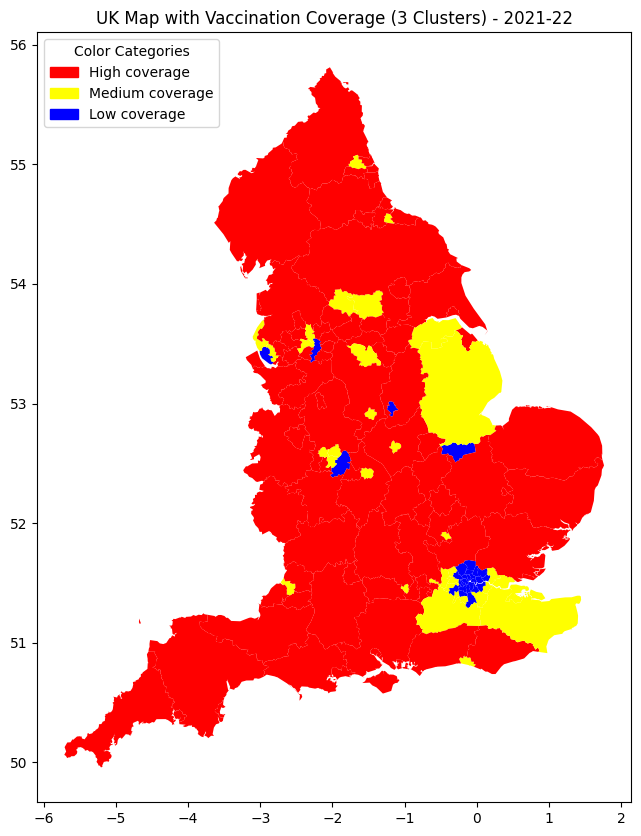

In [126]:
shapefile_path = '/content/COUNTI_1.GEO'  ### Add the path to the GEO file
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the GeoJSON file
gdf2 = gpd.read_file(shapefile_path)

# Merge the shapefile with cluster data
merged_data2 = gdf2.merge(clustered_full2, how='left', left_on='CTYUA21CD', right_on='OrgCode')

# Assign cluster value for Rutland
cluster_value2 = merged_data2.loc[merged_data2['CTYUA21CD'] == 'E10000034', 'cluster2'].iloc[0]  # Worcestershire cluster
merged_data2.loc[merged_data2['CTYUA21CD'] == 'E06000017', 'cluster2'] = cluster_value2  # Assign Worcestershire's cluster to Rutland

# Drop rows with NaN clusters
merged_data2.dropna(subset=['cluster2'], inplace=True)

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_data2.plot(ax=ax, color=merged_data2['cluster2'])

# Create custom legend
labels = ['High coverage', 'Medium coverage', 'Low coverage']  # Labels for each color
colors = ['red', 'yellow', 'blue']  # Colors matching those used in the map
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]

# Add legend, title, and show the plot
plt.legend(handles=legend_patches, loc='upper left', title="Color Categories")
plt.title("UK Map with Vaccination Coverage (3 Clusters) - 2021-22")


# Save the plot as an image
plt.savefig("UK_Map_3_Clusters.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


### 3.3. (6 Clusters)

In [175]:
clusters=clustering_data['cluster3']

In [176]:
def new_cluster(cluster):
    if cluster == 5:
        return 'Red'  # Highest coverage
    if cluster == 2:
        return 'Orange'  # Very High coverage
    if cluster == 0:
        return 'Yellow'  # High coverage
    if cluster == 4:
        return 'LightGreen'  # Medium coverage
    if cluster == 1:
        return 'SkyBlue'  # Low coverage
    if cluster == 3:
        return 'Blue'  # Lowest coverage
    else:
        return str(cluster)

clusters=clusters.apply(new_cluster)
clustered_full3=pd.merge(clustering_data_original,clusters,left_index=True,right_index=True, how='left')
# clustered_full.head(50)

In [177]:
clustered_full3

,OrgCode,OrgName,DTaP_IPV_5y,DTaP_IPV_Hib_5y,DTaP_IPV_Hib_HepB_12m,DTaP_IPV_Hib_HepB_24m,Hib_MenC_24m,Hib_MenC_5y,MenB_12m,MenB_booster_24m,MMR_24m,MMR1_5y,MMR2_5y,PCV_12m,PCV_24m,Rota_12m,cluster3
0,E06000001,Hartlepool,84.9,96.1,93.2,96.5,92.6,92.9,93.8,92.6,92.4,95.3,86.8,97.2,92.6,92.6,Orange
1,E06000002,Middlesbrough,81.8,92.4,90.2,90.7,87.5,88.2,89.5,85.8,87.9,91.8,84.0,93.3,87.5,87.9,Yellow
2,E06000003,Redcar and Cleveland,89.8,97.4,95.4,95.5,93.3,95.2,96.2,92.7,93.2,97.0,92.8,97.2,93.3,93.1,Red
3,E06000004,Stockton-on-Tees,89.3,97.3,96.0,96.0,95.4,95.0,96.4,94.4,95.6,97.2,92.5,97.8,95.4,95.1,Red
4,E06000005,Darlington,90.3,96.9,95.0,95.1,93.1,93.7,94.2,93.0,93.1,94.9,90.3,96.3,93.2,93.3,Orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,E10000029,Suffolk,90.1,95.3,95.0,96.2,93.6,92.4,94.6,93.0,93.6,94.7,90.8,96.1,93.5,93.3,Orange
145,E10000030,Surrey,83.3,92.3,92.3,92.2,89.0,91.1,92.2,87.4,89.4,93.9,83.9,94.3,88.7,90.8,Yellow
146,E10000031,Warwickshire,89.4,96.7,95.0,95.5,92.2,94.7,94.6,91.3,92.9,96.0,90.5,95.7,92.2,93.9,Orange
147,E10000032,West Sussex,89.8,95.8,95.0,95.3,93.2,93.2,94.8,92.7,93.2,95.3,91.4,96.1,93.2,93.3,Orange


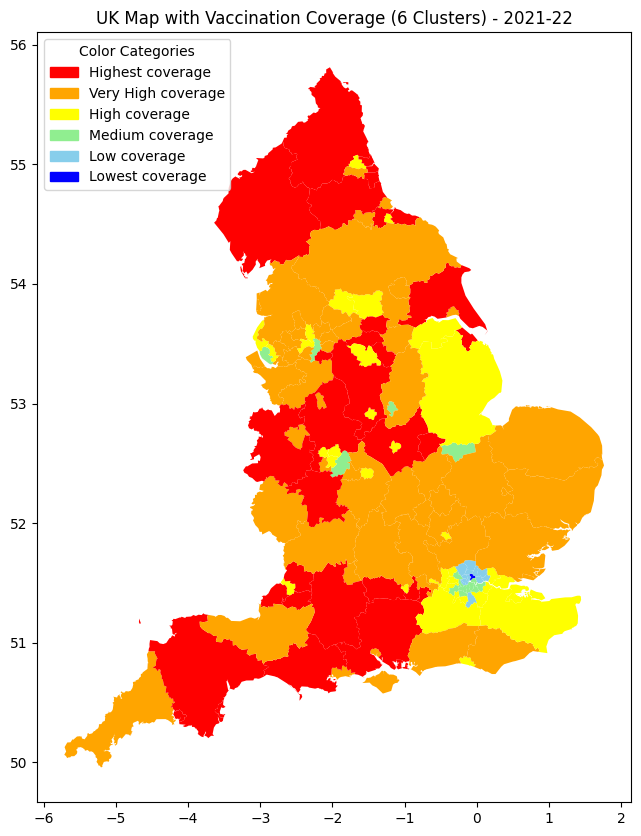

In [178]:
shapefile_path = '/content/COUNTI_1.GEO'
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the GeoJSON file
gdf3 = gpd.read_file(shapefile_path)

# Merge the shapefile with cluster data
merged_data3 = gdf2.merge(clustered_full3, how='left', left_on='CTYUA21CD', right_on='OrgCode')

# Assign cluster value for Rutland
cluster_value3 = merged_data3.loc[merged_data3['CTYUA21CD'] == 'E10000034', 'cluster3'].iloc[0]  # Worcestershire cluster
merged_data3.loc[merged_data3['CTYUA21CD'] == 'E06000017', 'cluster3'] = cluster_value3  # Assign Worcestershire's cluster to Rutland

# Drop rows with NaN clusters
merged_data3.dropna(subset=['cluster3'], inplace=True)

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_data3.plot(ax=ax, color=merged_data3['cluster3'])

# Create custom legend
labels = ['Highest coverage', 'Very High coverage', 'High coverage', 'Medium coverage', 'Low coverage', 'Lowest coverage']
colors = ['red', 'orange', 'yellow', 'lightgreen', 'skyblue', 'blue']

legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]

# Add legend, title, and show the plot
plt.legend(handles=legend_patches, loc='upper left', title="Color Categories")
plt.title("UK Map with Vaccination Coverage (6 Clusters) - 2021-22")


# Save the plot as an image
plt.savefig("UK_Map_6_Clusters.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


# 4. List of regions

#### 4.1. Two Clusters

In [22]:
clustering_data_original['cluster']=cluster_ids

a=cluster_ids['cluster'].unique()
Regions={}
for i in a:
  l=[]
  for j in range(clustering_data_original.shape[0]):
    if clustering_data_original.loc[j,'cluster']==i:
      l.append(clustering_data_original.loc[j,'OrgName'])
  Regions[i]=l


In [23]:
Regions

{np.int64(0): ['Hartlepool',
  'Middlesbrough',
  'Redcar and Cleveland',
  'Stockton-on-Tees',
  'Darlington',
  'Halton',
  'Warrington',
  'Blackburn with Darwen',
  'Blackpool',
  'Kingston upon Hull',
  'East Riding of Yorkshire',
  'North East Lincolnshire',
  'North Lincolnshire',
  'York',
  'Derby',
  'Leicester',
  'Herefordshire',
  'Telford and Wrekin',
  'Stoke-on-Trent',
  'Bath and North East Somerset',
  'Bristol',
  'North Somerset',
  'South Gloucestershire',
  'Plymouth',
  'Torbay',
  'Swindon',
  'Luton',
  'Southend-on-Sea',
  'Thurrock',
  'Medway',
  'Bracknell Forest',
  'West Berkshire',
  'Reading',
  'Slough',
  'Windsor and Maidenhead',
  'Wokingham',
  'Milton Keynes',
  'Brighton and Hove',
  'Portsmouth',
  'Southampton',
  'Isle of Wight',
  'County Durham',
  'Cheshire East',
  'Cheshire West and Chester',
  'Shropshire',
  'Cornwall',
  'Wiltshire',
  'Bedford',
  'Central Bedfordshire',
  'Northumberland',
  'Bournemouth, Christchurch and Poole',
  '

#### 4.2. Three Clusters

In [127]:
clustering_data_original['cluster2']=cluster_ids3

a=cluster_ids3['cluster2'].unique()
Regions={}
for i in a:
  l=[]
  for j in range(clustering_data_original.shape[0]):
    if clustering_data_original.loc[j,'cluster2']==i:
      l.append(clustering_data_original.loc[j,'OrgName'])
  Regions[i]=l


In [128]:
Regions

{np.int64(1): ['Hartlepool',
  'Redcar and Cleveland',
  'Stockton-on-Tees',
  'Darlington',
  'Halton',
  'Warrington',
  'Blackburn with Darwen',
  'Blackpool',
  'Kingston upon Hull',
  'East Riding of Yorkshire',
  'North East Lincolnshire',
  'York',
  'Herefordshire',
  'Telford and Wrekin',
  'Stoke-on-Trent',
  'Bath and North East Somerset',
  'North Somerset',
  'South Gloucestershire',
  'Plymouth',
  'Torbay',
  'Swindon',
  'Southend-on-Sea',
  'Bracknell Forest',
  'West Berkshire',
  'Windsor and Maidenhead',
  'Wokingham',
  'Milton Keynes',
  'Portsmouth',
  'Southampton',
  'Isle of Wight',
  'County Durham',
  'Cheshire East',
  'Cheshire West and Chester',
  'Shropshire',
  'Cornwall',
  'Wiltshire',
  'Bedford',
  'Central Bedfordshire',
  'Northumberland',
  'Bournemouth, Christchurch and Poole',
  'Dorset',
  'Buckinghamshire',
  'North Northamptonshire',
  'West Northamptonshire',
  'Bolton',
  'Oldham',
  'Rochdale',
  'Stockport',
  'Tameside',
  'Trafford',
 

#### 4.3. Six Clusters

In [179]:
clustering_data_original['cluster3']=cluster_ids6

a=cluster_ids6['cluster3'].unique()
Regions={}
for i in a:
  l=[]
  for j in range(clustering_data_original.shape[0]):
    if clustering_data_original.loc[j,'cluster3']==i:
      l.append(clustering_data_original.loc[j,'OrgName'])
  Regions[i]=l

In [180]:
Regions

{np.int64(2): ['Hartlepool',
  'Darlington',
  'Halton',
  'Warrington',
  'Blackburn with Darwen',
  'Blackpool',
  'Kingston upon Hull',
  'York',
  'Herefordshire',
  'Telford and Wrekin',
  'Stoke-on-Trent',
  'Swindon',
  'Southend-on-Sea',
  'Windsor and Maidenhead',
  'Milton Keynes',
  'Southampton',
  'Isle of Wight',
  'Cheshire East',
  'Cheshire West and Chester',
  'Cornwall',
  'Bedford',
  'Central Bedfordshire',
  'Bournemouth, Christchurch and Poole',
  'Buckinghamshire',
  'North Northamptonshire',
  'West Northamptonshire',
  'Bolton',
  'Oldham',
  'Rochdale',
  'Tameside',
  'Trafford',
  'Wigan',
  'St Helens',
  'Wirral',
  'Doncaster',
  'Dudley',
  'Solihull',
  'Calderdale',
  'Kirklees',
  'Gateshead',
  'Cambridgeshire',
  'East Sussex',
  'Essex',
  'Gloucestershire',
  'Hertfordshire',
  'Lancashire',
  'Norfolk',
  'North Yorkshire',
  'Nottinghamshire',
  'Oxfordshire',
  'Somerset',
  'Suffolk',
  'Warwickshire',
  'West Sussex'],
 np.int64(0): ['Middle

# 5. Classification

### 5.1. Two Clusters

* Adding Rutland to the vaccination dataset

 Leicestershire vaccination data also contains Rutland vaccination data, but the demographic data for these two regions are presented separately.

 This means, we have 149 regions in vaccination data but 150 regions in the demographic data

 To make both datasets consistent, we find the cluster for Leicestershire and assume the same vaccination cluster applies to Rutland.

We add Rutland to the clustering data

In [24]:
### Attaching the cluster numbers to the regions' UTLA codes
a = clustering_data_original[['OrgCode']]
b=pd.concat([a,cluster_ids],axis=1)

In [28]:
b

,OrgCode,cluster
0,E06000001,0
1,E06000002,0
2,E06000003,0
3,E06000004,0
4,E06000005,0
...,...,...
144,E10000029,0
145,E10000030,0
146,E10000031,0
147,E10000032,0


In [25]:
## Finding the region code for Leicestershire
clustering_data_original.loc[clustering_data_original['OrgName'] == 'Leicestershire', 'OrgCode']

,OrgCode
136,E10000018


In [26]:
## Finding the cluster number for the Leicestershire UTLA code and using it as the Rutland cluster number
Rutland_cluster=b.loc[b['OrgCode']=='E10000018','cluster'].iloc[0]

In [27]:
Rutland_cluster

np.int64(0)

In [28]:

# Adding Rutland to the vaccination dataset(clustering dataset) with both OrgCode and OrgName
b.loc[len(b)] = ['E06000017', Rutland_cluster]


In [33]:
b

,OrgCode,cluster
0,E06000001,0
1,E06000002,0
2,E06000003,0
3,E06000004,0
4,E06000005,0
...,...,...
145,E10000030,0
146,E10000031,0
147,E10000032,0
148,E10000034,0


In [29]:
# We now have clustering labels for 150 regions (including Rutland)
counts = b['cluster'].value_counts()
print(counts)

cluster
0    122
1     28
Name: count, dtype: int64


In [30]:
## Attaching the clustering labels to the demographic data based on their common identifiers (UTLA name)
class_data=pd.merge(demographic_data, b, on='OrgCode')


In [31]:
class_data

,OrgCode,OrgName,IMD - Average score,IMD-Proportion Deprived,Born outside UK,No qualifications,Routine occupations,Long-term unemployed,Rurality,English Proficiency,Ethnic Minority,cluster
0,E06000001,Hartlepool,35.037,0.3621,0.039650,0.231449,0.157165,0.141004,3,0.020980,0.035413,0
1,E06000002,Middlesbrough,40.460,0.4884,0.122881,0.239444,0.150608,0.153241,3,0.075718,0.176311,0
2,E06000003,Redcar and Cleveland,29.792,0.2386,0.029144,0.220149,0.149438,0.123819,4,0.010991,0.023013,0
3,E06000004,Stockton-on-Tees,25.790,0.2083,0.062397,0.186324,0.141004,0.113626,3,0.029750,0.079637,0
4,E06000005,Darlington,25.657,0.1846,0.078164,0.192629,0.152080,0.102060,3,0.042083,0.056319,0
...,...,...,...,...,...,...,...,...,...,...,...,...
145,E10000030,Surrey,10.087,0.0000,0.179225,0.128561,0.067494,0.054904,1,0.069352,0.145016,0
146,E10000031,Warwickshire,15.640,0.0177,0.125152,0.168685,0.127284,0.063482,4,0.069296,0.109085,0
147,E10000032,West Sussex,14.429,0.0099,0.129064,0.157601,0.095401,0.060295,3,0.058180,0.089676,0
148,E10000034,Worcestershire,18.089,0.0495,0.080332,0.180093,0.119641,0.065772,4,0.043612,0.061609,0


In [32]:
X=class_data.drop(['OrgCode','OrgName','cluster'],axis=1)
y=class_data['cluster']
feature_names = X.columns


In [33]:
X

,IMD - Average score,IMD-Proportion Deprived,Born outside UK,No qualifications,Routine occupations,Long-term unemployed,Rurality,English Proficiency,Ethnic Minority
0,35.037,0.3621,0.039650,0.231449,0.157165,0.141004,3,0.020980,0.035413
1,40.460,0.4884,0.122881,0.239444,0.150608,0.153241,3,0.075718,0.176311
2,29.792,0.2386,0.029144,0.220149,0.149438,0.123819,4,0.010991,0.023013
3,25.790,0.2083,0.062397,0.186324,0.141004,0.113626,3,0.029750,0.079637
4,25.657,0.1846,0.078164,0.192629,0.152080,0.102060,3,0.042083,0.056319
...,...,...,...,...,...,...,...,...,...
145,10.087,0.0000,0.179225,0.128561,0.067494,0.054904,1,0.069352,0.145016
146,15.640,0.0177,0.125152,0.168685,0.127284,0.063482,4,0.069296,0.109085
147,14.429,0.0099,0.129064,0.157601,0.095401,0.060295,3,0.058180,0.089676
148,18.089,0.0495,0.080332,0.180093,0.119641,0.065772,4,0.043612,0.061609


In [34]:
y

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
145,0
146,0
147,0
148,0


In [36]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [37]:
import sys
import sklearn
import catboost
import shap
import scipy
from sklearn.preprocessing import MinMaxScaler
print("Python version:", sys.version)
print("scikit-learn version:", sklearn.__version__)
print("catboost version:", catboost.__version__)
print("shap version:", shap.__version__)
print("scipy version:", scipy.__version__)

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
scikit-learn version: 1.6.1
catboost version: 1.2.8
shap version: 0.49.1
scipy version: 1.16.2


Feature Importance (sorted):
                   Feature  Mean Importance  Std Importance
0          Born outside UK         0.258285        0.133762
1      English Proficiency         0.156321        0.111081
2                 Rurality         0.144713        0.036263
3          Ethnic Minority         0.129000        0.097178
4      Routine occupations         0.092471        0.099779
5      IMD - Average score         0.085009        0.055919
6     Long-term unemployed         0.058103        0.021983
7        No qualifications         0.040279        0.018095
8  IMD-Proportion Deprived         0.035819        0.010774

Mean Accuracy: 0.9200 ± 0.0542
Mean Precision (macro): 0.8889 ± 0.0845
Mean Recall (macro): 0.8652 ± 0.1133
Mean F1 Score (macro): 0.8614 ± 0.0939
Mean Specificity (macro): 0.8652 ± 0.1133
Mean Sensitivity (macro, same as recall): 0.8652 ± 0.1133

Per-class metrics averaged across 5 folds:
 Class  Precision_mean  Precision_std  Sensitivity(Recall)_mean  Sensitivity(Re

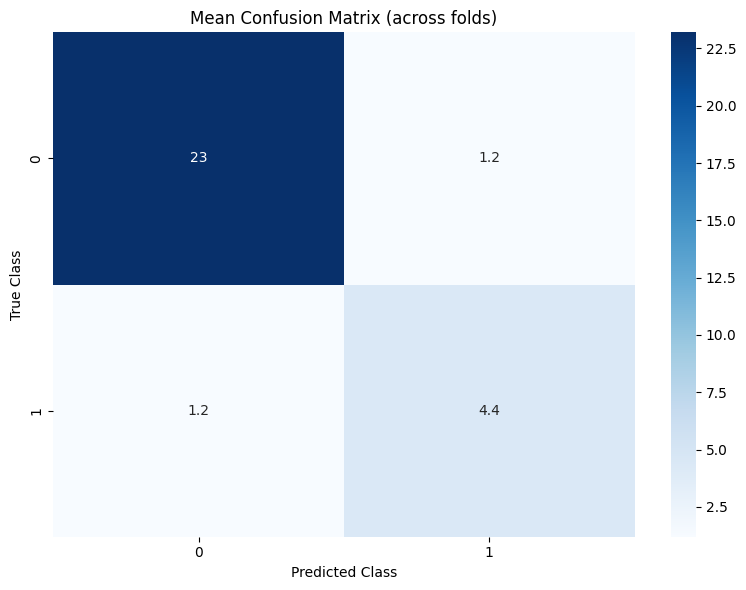

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
# Define Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Classes (fixed order across folds)
classes = np.unique(y)

# Initialize lists to store evaluation metrics
feature_importances = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
confusion_matrices = []
specificities = []
sensitivities = []  # Sensitivity is the recall per class (macro-averaged in your code)

# NEW: store per-class metrics for each fold
per_class_precision_folds = []
per_class_recall_folds = []       # Sensitivity
per_class_f1_folds = []
per_class_specificity_folds = []

# Cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = pd.DataFrame(X_train, columns=feature_names)
    X_test = pd.DataFrame(X_test, columns=feature_names)

    cat_features = [i for i, col in enumerate(X_train.columns)
                    if X_train[col].dtype == 'object' or X_train[col].dtype.name == 'category']

    # Model
    model = CatBoostClassifier(eval_metric='Accuracy', random_state=42, verbose=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # SHAP importances (CatBoost)
    train_pool = Pool(X_train, label=y_train, cat_features=cat_features)
    test_pool = Pool(X_test, y_test, cat_features=cat_features)
    shap_values = model.get_feature_importance(test_pool, type='ShapValues')
    shap_importances = np.abs(shap_values[:, :-1]).mean(axis=0)
    feature_importances.append(shap_importances)

    # Store evaluation metrics (macro)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

    # Confusion matrix for this fold (fixed label order)
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    confusion_matrices.append(cm)

    # --- Per-class metrics for this fold ---
    # Precision/Recall/F1 per class via sklearn (ensure same class order)
    fold_prec = precision_score(y_test, y_pred, labels=classes, average=None, zero_division=0)
    fold_rec  = recall_score(y_test, y_pred, labels=classes, average=None)  # Sensitivity
    fold_f1   = f1_score(y_test, y_pred, labels=classes, average=None)

    # Specificity per class from the confusion matrix
    fold_spec = []
    for i in range(len(classes)):
        tp = cm[i, i]
        fn = cm[i, :].sum() - tp
        fp = cm[:, i].sum() - tp
        tn = cm.sum() - (tp + fp + fn)
        spec = tn / (tn + fp) if (tn + fp) != 0 else 0.0
        fold_spec.append(spec)
    fold_spec = np.array(fold_spec)

    per_class_precision_folds.append(fold_prec)
    per_class_recall_folds.append(fold_rec)
    per_class_f1_folds.append(fold_f1)
    per_class_specificity_folds.append(fold_spec)

    # Also keep your macro sensitivity/specificity (averaged within fold)
    specificity_per_class = fold_spec.tolist()
    sensitivity_per_class = fold_rec.tolist()
    specificities.append(np.mean(specificity_per_class))
    sensitivities.append(np.mean(sensitivity_per_class))

# ---------- Aggregate across folds ----------
# Feature importances
feature_importances = np.array(feature_importances)
mean_importances = np.mean(feature_importances, axis=0)
std_importances = np.std(feature_importances, axis=0)

# Macro metrics
mean_accuracy = np.mean(accuracies); std_accuracy = np.std(accuracies)
mean_precision = np.mean(precisions); std_precision = np.std(precisions)
mean_recall = np.mean(recalls);       std_recall = np.std(recalls)
mean_f1_score = np.mean(f1_scores);   std_f1_score = np.std(f1_scores)
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_specificity = np.mean(specificities); std_specificity = np.std(specificities)
mean_sensitivity = np.mean(sensitivities); std_sensitivity = np.std(sensitivities)

# NEW: Per-class metrics aggregated over folds (mean ± std per class)
per_class_precision = np.vstack(per_class_precision_folds)   # shape: (folds, n_classes)
per_class_recall    = np.vstack(per_class_recall_folds)
per_class_f1        = np.vstack(per_class_f1_folds)
per_class_specificity = np.vstack(per_class_specificity_folds)

per_class_summary = pd.DataFrame({
    'Class': classes,
    'Precision_mean': per_class_precision.mean(axis=0),
    'Precision_std':  per_class_precision.std(axis=0),
    'Sensitivity(Recall)_mean': per_class_recall.mean(axis=0),
    'Sensitivity(Recall)_std':  per_class_recall.std(axis=0),
    'Specificity_mean': per_class_specificity.mean(axis=0),
    'Specificity_std':  per_class_specificity.std(axis=0),
    'F1_mean': per_class_f1.mean(axis=0),
    'F1_std':  per_class_f1.std(axis=0),
})

# ---------- Normalise feature importance (your Method 1) ----------
mean_importances = mean_importances / mean_importances.sum()

# Feature importance table
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Mean Importance': mean_importances,
    'Std Importance': std_importances
}).sort_values(by='Mean Importance', ascending=False).reset_index(drop=True)

# ---------- Display ----------
print("Feature Importance (sorted):")
print(feature_importance_df)

print(f"\nMean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean Precision (macro): {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean Recall (macro): {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 Score (macro): {mean_f1_score:.4f} ± {std_f1_score:.4f}")
print(f"Mean Specificity (macro): {mean_specificity:.4f} ± {std_specificity:.4f}")
print(f"Mean Sensitivity (macro, same as recall): {mean_sensitivity:.4f} ± {std_sensitivity:.4f}")

print("\nPer-class metrics averaged across 5 folds:")
print(per_class_summary.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

plt.figure(figsize=(8, 6))
sns.heatmap(mean_confusion_matrix, annot=True, cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title('Mean Confusion Matrix (across folds)')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.tight_layout()
plt.show()


In [43]:
feature_importance_df

,Feature,Mean Importance,Std Importance
0,Born outside UK,0.258285,0.133762
1,English Proficiency,0.156321,0.111081
2,Rurality,0.144713,0.036263
3,Ethnic Minority,0.129000,0.097178
4,Routine occupations,0.092471,0.099779
5,IMD - Average score,0.085009,0.055919
6,Long-term unemployed,0.058103,0.021983
7,No qualifications,0.040279,0.018095
8,IMD-Proportion Deprived,0.035819,0.010774


/tmp/ipython-input-2077174083.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean Importance', y='Feature', data=feature_importance_df, palette=colors)


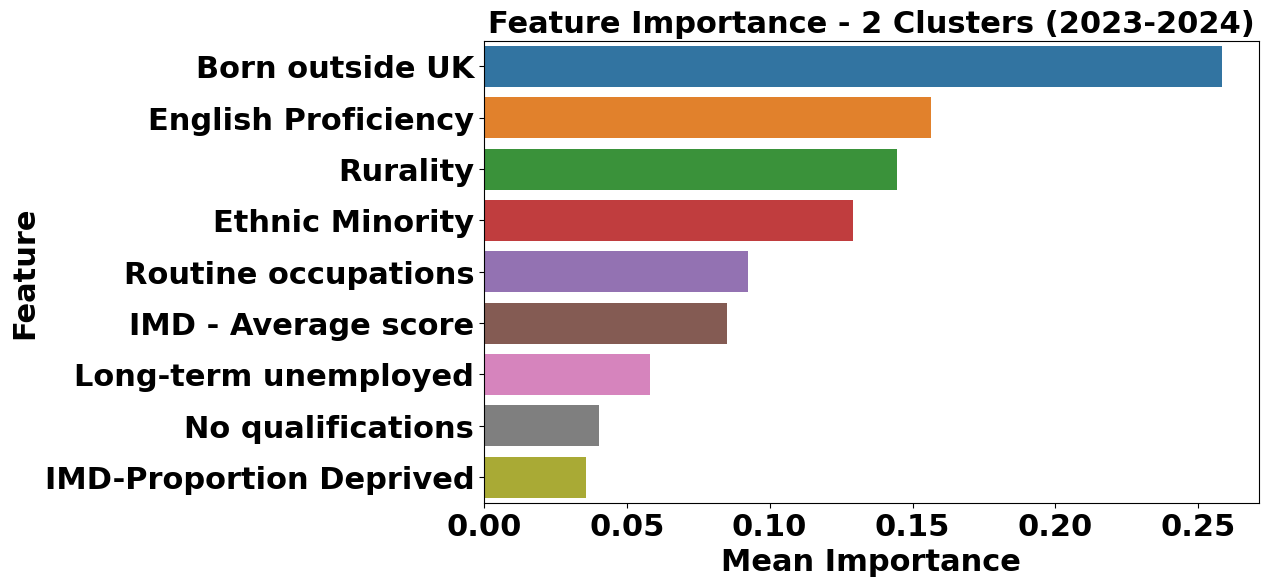

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt


# Example: custom color list (must match number of features)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'][:len(feature_importance_df)]

plt.figure(figsize=(10, 6))
sns.barplot(x='Mean Importance', y='Feature', data=feature_importance_df, palette=colors)

# Customize title and axis labels
plt.title('Feature Importance - 2 Clusters (2023-2024)', fontsize=22, fontweight='bold')
plt.xlabel('Mean Importance', fontsize=22, fontweight='bold')  # Bold x-axis label
plt.ylabel('Feature', fontsize=22, fontweight='bold')  # Bold y-axis label
plt.xticks(fontsize=22,fontweight='bold')
plt.yticks(fontsize=22,fontweight='bold')
# Save the plot as an image
plt.savefig("feature_importance_plot_2_clusters_2023-24.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

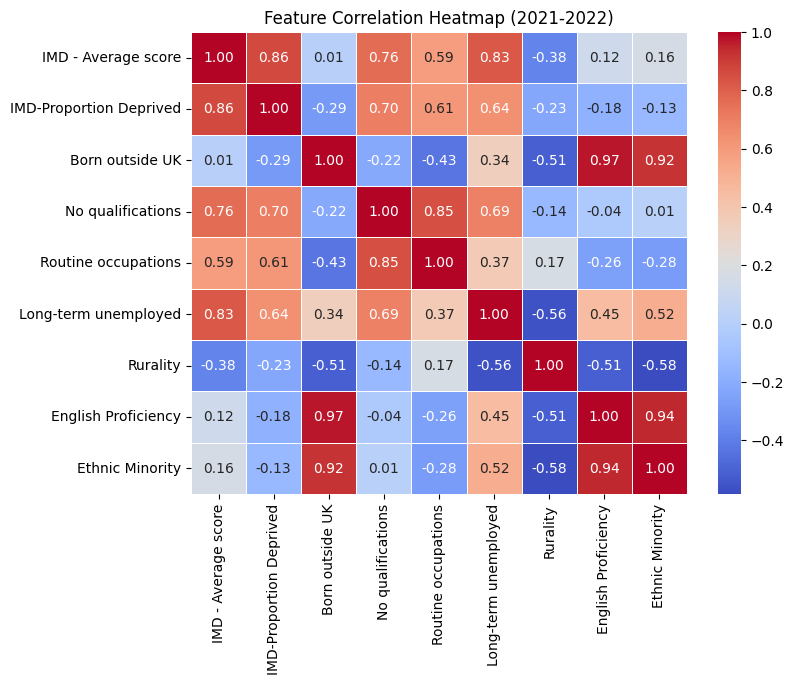

In [39]:
# Feature correlation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
corr_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap (2021-2022)')
plt.savefig("feature_correlation_heatmap_2021_22.png", dpi=300, bbox_inches='tight')
plt.show()

### 5.2. Three Clusters

 * Adding Rutland

In [129]:
a3=clustering_data_original[['OrgCode']]
b3=pd.concat([a3,cluster_ids3],axis=1)

In [130]:
b3

,OrgCode,cluster2
0,E06000001,1
1,E06000002,2
2,E06000003,1
3,E06000004,1
4,E06000005,1
...,...,...
144,E10000029,1
145,E10000030,2
146,E10000031,1
147,E10000032,1


In [135]:
Rutland_cluster=b3.loc[b3['OrgCode']=='E10000018','cluster2'].iloc[0]

In [136]:
Rutland_cluster

np.int64(1)

In [137]:
b3.loc[len(b3)] =['E06000017', Rutland_cluster]

In [138]:
b3

,OrgCode,cluster2
0,E06000001,1
1,E06000002,2
2,E06000003,1
3,E06000004,1
4,E06000005,1
...,...,...
145,E10000030,2
146,E10000031,1
147,E10000032,1
148,E10000034,1


In [139]:
counts = b3['cluster2'].value_counts()
print(counts)

cluster2
1    87
2    35
0    28
Name: count, dtype: int64


In [140]:
class_data2=pd.merge(demographic_data, b3, on='OrgCode')

In [141]:
class_data2

,OrgCode,OrgName,IMD - Average score,IMD-Proportion Deprived,Born outside UK,No qualifications,Routine occupations,Long-term unemployed,Rurality,English Proficiency,Ethnic Minority,cluster2
0,E06000001,Hartlepool,35.037,0.3621,0.039650,0.231449,0.157165,0.141004,3,0.020980,0.035413,1
1,E06000002,Middlesbrough,40.460,0.4884,0.122881,0.239444,0.150608,0.153241,3,0.075718,0.176311,2
2,E06000003,Redcar and Cleveland,29.792,0.2386,0.029144,0.220149,0.149438,0.123819,4,0.010991,0.023013,1
3,E06000004,Stockton-on-Tees,25.790,0.2083,0.062397,0.186324,0.141004,0.113626,3,0.029750,0.079637,1
4,E06000005,Darlington,25.657,0.1846,0.078164,0.192629,0.152080,0.102060,3,0.042083,0.056319,1
...,...,...,...,...,...,...,...,...,...,...,...,...
145,E10000030,Surrey,10.087,0.0000,0.179225,0.128561,0.067494,0.054904,1,0.069352,0.145016,2
146,E10000031,Warwickshire,15.640,0.0177,0.125152,0.168685,0.127284,0.063482,4,0.069296,0.109085,1
147,E10000032,West Sussex,14.429,0.0099,0.129064,0.157601,0.095401,0.060295,3,0.058180,0.089676,1
148,E10000034,Worcestershire,18.089,0.0495,0.080332,0.180093,0.119641,0.065772,4,0.043612,0.061609,1


In [142]:
X=class_data2.drop(['OrgCode','OrgName','cluster2'],axis=1)
y=class_data2['cluster2']
feature_names = X.columns

In [143]:
y.value_counts()

,count
cluster2,
1,87
2,35
0,28


In [144]:
from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X=scaler.fit_transform(X)
# X=pd.DataFrame(X,columns=feature_names)

In [ ]:
pip install catboost  ## Do not reinstall this package if you have already done it for the two-cluster case

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.3 MB/s eta 0:00:00


Feature Importance (sorted):
                   Feature  Mean Importance (norm 0.1–1.0)  Std Importance
0          Born outside UK                        1.000000        0.090953
1      English Proficiency                        0.770242        0.044444
2          Ethnic Minority                        0.659137        0.078799
3                 Rurality                        0.558446        0.043257
4      Routine occupations                        0.384359        0.039111
5        No qualifications                        0.327276        0.041621
6      IMD - Average score                        0.281584        0.051557
7     Long-term unemployed                        0.243460        0.024640
8  IMD-Proportion Deprived                        0.100000        0.020750

Mean Accuracy: 0.7733 ± 0.0742
Mean Precision (macro): 0.7247 ± 0.0876
Mean Recall (macro): 0.7178 ± 0.0836
Mean F1 Score (macro): 0.7136 ± 0.0824
Mean Specificity (macro): 0.8720 ± 0.0452
Mean Sensitivity (macro, same a

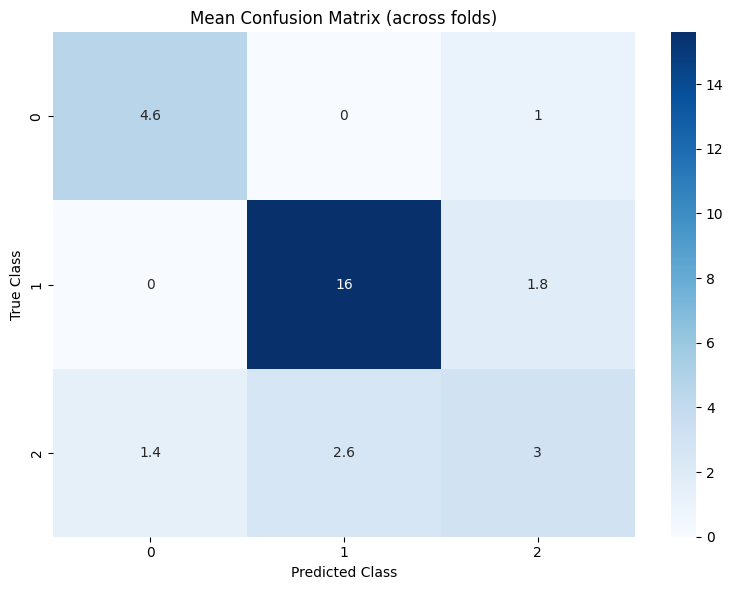

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostClassifier, Pool
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

# ---------------- Stratified K-Fold ----------------
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Fixed class order across folds (important for consistent per-class arrays)
classes = np.unique(y)

# ---------------- Metric collectors ----------------
feature_importances = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
confusion_matrices = []
specificities = []
sensitivities = []  # (macro) sensitivity = (macro) recall

# NEW: per-class collectors (each entry is an array of shape (n_classes,))
per_class_precision_folds = []
per_class_recall_folds = []        # Sensitivity
per_class_f1_folds = []
per_class_specificity_folds = []

# ---------------- CV Loop ----------------
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scale
    scaler = MinMaxScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_names)
    X_test  = pd.DataFrame(scaler.transform(X_test), columns=feature_names)

    # ----- Model -----
    model = CatBoostClassifier(eval_metric='Accuracy', random_state=42, verbose=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ----- SHAP feature importances (multi-class aggregated) -----
    test_pool = Pool(X_test, y_test)
    shap_values = model.get_feature_importance(test_pool, type='ShapValues')
    # For multi-class CatBoost: (n_samples, n_classes, n_features + 1). Drop expected value column.
    shap_values = shap_values[:, :, :-1]
    shap_importances = np.abs(shap_values).mean(axis=(0, 1))  # mean over samples & classes
    feature_importances.append(shap_importances)

    # ----- Macro metrics (your originals) -----
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

    # ----- Confusion matrix (fixed label order) -----
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    confusion_matrices.append(cm)

    # ----- Per-class metrics for this fold -----
    fold_prec = precision_score(y_test, y_pred, labels=classes, average=None, zero_division=0)
    fold_rec  = recall_score(y_test, y_pred, labels=classes, average=None)   # Sensitivity
    fold_f1   = f1_score(y_test, y_pred, labels=classes, average=None)

    # Specificity per class from confusion matrix (OvR)
    fold_spec = []
    for i in range(len(classes)):
        tp = cm[i, i]
        fn = cm[i, :].sum() - tp
        fp = cm[:, i].sum() - tp
        tn = cm.sum() - (tp + fp + fn)
        spec = tn / (tn + fp) if (tn + fp) != 0 else 0.0
        fold_spec.append(spec)
    fold_spec = np.array(fold_spec)

    per_class_precision_folds.append(fold_prec)
    per_class_recall_folds.append(fold_rec)
    per_class_f1_folds.append(fold_f1)
    per_class_specificity_folds.append(fold_spec)

    # Keep your (within-fold) macro specificity/sensitivity too
    specificities.append(fold_spec.mean())
    sensitivities.append(fold_rec.mean())

# ---------------- Aggregate across folds ----------------
feature_importances = np.array(feature_importances)
mean_importances = np.mean(feature_importances, axis=0)
std_importances = np.std(feature_importances, axis=0)

# Normalise feature importance to [0.1, 1.0] (your method)
min_val, max_val = mean_importances.min(), mean_importances.max()
new_min, new_max = 0.1, 1.0
mean_importances = [
    new_min + (x - min_val) * (new_max - new_min) / (max_val - min_val) if max_val > min_val else 1.0
    for x in mean_importances
]

# Macro metrics (mean ± std across folds)
mean_accuracy, std_accuracy = np.mean(accuracies), np.std(accuracies)
mean_precision, std_precision = np.mean(precisions), np.std(precisions)
mean_recall, std_recall = np.mean(recalls), np.std(recalls)
mean_f1_score, std_f1_score = np.mean(f1_scores), np.std(f1_scores)
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_specificity, std_specificity = np.mean(specificities), np.std(specificities)
mean_sensitivity, std_sensitivity = np.mean(sensitivities), np.std(sensitivities)

# ---- Per-class metrics aggregated over folds (mean ± std per class) ----
per_class_precision = np.vstack(per_class_precision_folds)       # (folds, n_classes)
per_class_recall    = np.vstack(per_class_recall_folds)
per_class_f1        = np.vstack(per_class_f1_folds)
per_class_specificity = np.vstack(per_class_specificity_folds)

per_class_summary = pd.DataFrame({
    'Class': classes,
    'Precision_mean': per_class_precision.mean(axis=0),
    'Precision_std':  per_class_precision.std(axis=0),
    'Sensitivity(Recall)_mean': per_class_recall.mean(axis=0),
    'Sensitivity(Recall)_std':  per_class_recall.std(axis=0),
    'Specificity_mean': per_class_specificity.mean(axis=0),
    'Specificity_std':  per_class_specificity.std(axis=0),
    'F1_mean': per_class_f1.mean(axis=0),
    'F1_std':  per_class_f1.std(axis=0),
})

# ---------------- Tables & Plots ----------------
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Mean Importance (norm 0.1–1.0)': mean_importances,
    'Std Importance': std_importances
}).sort_values(by='Mean Importance (norm 0.1–1.0)', ascending=False).reset_index(drop=True)

print("Feature Importance (sorted):")
print(feature_importance_df)

print(f"\nMean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean Precision (macro): {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean Recall (macro): {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 Score (macro): {mean_f1_score:.4f} ± {std_f1_score:.4f}")
print(f"Mean Specificity (macro): {mean_specificity:.4f} ± {std_specificity:.4f}")
print(f"Mean Sensitivity (macro, same as recall): {mean_sensitivity:.4f} ± {std_sensitivity:.4f}")

print("\nPer-class metrics averaged across 5 folds:")
print(per_class_summary.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

plt.figure(figsize=(8, 6))
sns.heatmap(mean_confusion_matrix, annot=True, cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title('Mean Confusion Matrix (across folds)')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1040084947.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean Importance (norm 0.1–1.0)', y='Feature', data=feature_importance_df, palette=colors)


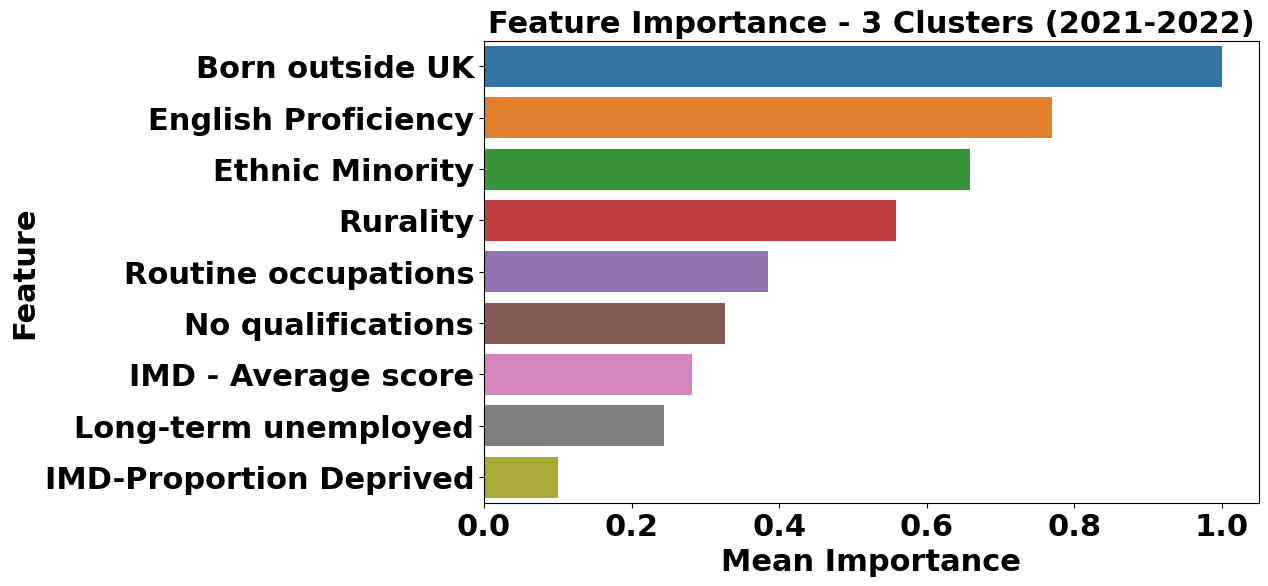

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: custom color list (must match number of features)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'][:len(feature_importance_df)]

plt.figure(figsize=(10, 6))
sns.barplot(x='Mean Importance (norm 0.1–1.0)', y='Feature', data=feature_importance_df, palette=colors)

# Customize title and axis labels
plt.title('Feature Importance - 3 Clusters (2021-2022)', fontsize=22, fontweight='bold')
plt.xlabel('Mean Importance', fontsize=22, fontweight='bold')
plt.ylabel('Feature', fontsize=22, fontweight='bold')
plt.xticks(fontsize=22,fontweight='bold')
plt.yticks(fontsize=22,fontweight='bold')
# Save the plot
plt.savefig("feature_importance_plot_3_clusters_2021-22.png", dpi=300, bbox_inches='tight')
plt.show()

### 5.3. Six Clusters

* Adding Rutland to the vaccination dataset

In [181]:
a6=clustering_data_original[['OrgCode']]
b6=pd.concat([a6,cluster_ids6],axis=1)

In [182]:
b6

,OrgCode,cluster3
0,E06000001,2
1,E06000002,0
2,E06000003,5
3,E06000004,5
4,E06000005,2
...,...,...
144,E10000029,2
145,E10000030,0
146,E10000031,2
147,E10000032,2


In [187]:
Rutland_cluster=b6.loc[b6['OrgCode']=='E10000018','cluster3'].iloc[0]

In [188]:
Rutland_cluster

np.int64(5)

In [189]:
b6.loc[len(b6)] =['E06000017', Rutland_cluster]

In [190]:
b6

,OrgCode,cluster3
0,E06000001,2
1,E06000002,0
2,E06000003,5
3,E06000004,5
4,E06000005,2
...,...,...
145,E10000030,0
146,E10000031,2
147,E10000032,2
148,E10000034,5


In [191]:
counts = b6['cluster3'].value_counts()
print(counts)

cluster3
2    54
0    35
5    33
4    15
1    12
3     1
Name: count, dtype: int64


In [192]:
counts = b6['cluster3'].value_counts()
print(counts)

cluster3
2    54
0    35
5    33
4    15
1    12
3     1
Name: count, dtype: int64


In [193]:
class_data3=pd.merge(demographic_data, b6, on='OrgCode')

In [194]:
class_data3

,OrgCode,OrgName,IMD - Average score,IMD-Proportion Deprived,Born outside UK,No qualifications,Routine occupations,Long-term unemployed,Rurality,English Proficiency,Ethnic Minority,cluster3
0,E06000001,Hartlepool,35.037,0.3621,0.039650,0.231449,0.157165,0.141004,3,0.020980,0.035413,2
1,E06000002,Middlesbrough,40.460,0.4884,0.122881,0.239444,0.150608,0.153241,3,0.075718,0.176311,0
2,E06000003,Redcar and Cleveland,29.792,0.2386,0.029144,0.220149,0.149438,0.123819,4,0.010991,0.023013,5
3,E06000004,Stockton-on-Tees,25.790,0.2083,0.062397,0.186324,0.141004,0.113626,3,0.029750,0.079637,5
4,E06000005,Darlington,25.657,0.1846,0.078164,0.192629,0.152080,0.102060,3,0.042083,0.056319,2
...,...,...,...,...,...,...,...,...,...,...,...,...
145,E10000030,Surrey,10.087,0.0000,0.179225,0.128561,0.067494,0.054904,1,0.069352,0.145016,0
146,E10000031,Warwickshire,15.640,0.0177,0.125152,0.168685,0.127284,0.063482,4,0.069296,0.109085,2
147,E10000032,West Sussex,14.429,0.0099,0.129064,0.157601,0.095401,0.060295,3,0.058180,0.089676,2
148,E10000034,Worcestershire,18.089,0.0495,0.080332,0.180093,0.119641,0.065772,4,0.043612,0.061609,5


In [195]:
X=class_data3.drop(['OrgCode','OrgName','cluster3'],axis=1)
y=class_data3['cluster3']
feature_names = X.columns

In [196]:
y.value_counts()

,count
cluster3,
2,54
0,35
5,33
4,15
1,12
3,1


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true sampl

Feature Importance (sorted):
                   Feature  Mean Importance (norm 0.1-1.0)  Std Importance
0          Born outside UK                        1.000000        0.066375
1      English Proficiency                        0.724478        0.020403
2                 Rurality                        0.470187        0.023961
3          Ethnic Minority                        0.444769        0.042855
4      Routine occupations                        0.356441        0.028286
5     Long-term unemployed                        0.329966        0.036677
6      IMD - Average score                        0.251274        0.035381
7        No qualifications                        0.248334        0.023513
8  IMD-Proportion Deprived                        0.100000        0.020561

Mean Accuracy: 0.4867 ± 0.0340
Mean Precision (macro): 0.4285 ± 0.0807
Mean Recall (macro): 0.4547 ± 0.0404
Mean F1 Score (macro): 0.4211 ± 0.0496
Mean Specificity (macro): 0.8832 ± 0.0073
Mean Sensitivity (macro, same a

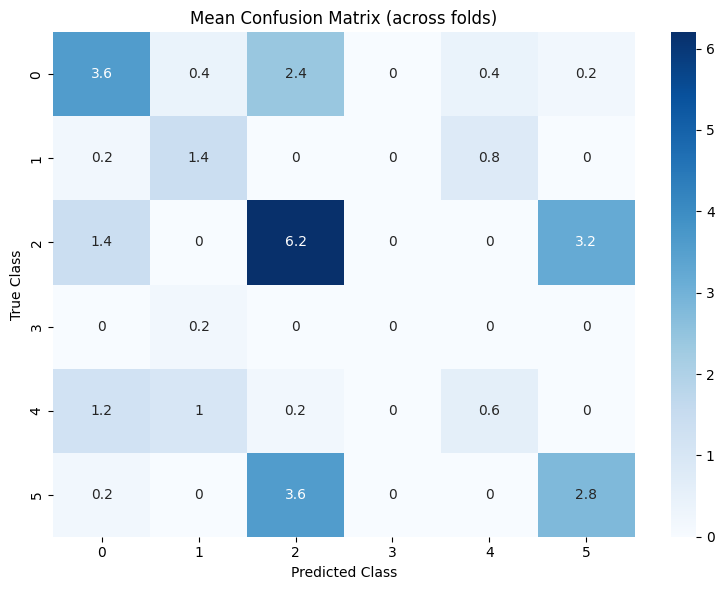

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

from catboost import CatBoostClassifier, Pool  # required by your code

# ---------------- Stratified K-Fold ----------------
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Fixed class order across folds (important for per-class metrics)
classes = np.unique(y)

# ---------------- Metric collectors ----------------
feature_importances = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
confusion_matrices = []
specificities = []
sensitivities = []  # (macro) sensitivity = (macro) recall

# NEW: per-class collectors (each element is an array of shape (n_classes,))
per_class_precision_folds = []
per_class_recall_folds = []        # Sensitivity
per_class_f1_folds = []
per_class_specificity_folds = []

# ---------------- CV Loop ----------------
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scale
    scaler = MinMaxScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_names)
    X_test  = pd.DataFrame(scaler.transform(X_test), columns=feature_names)

    # Model (your CatBoost setup)
    model = CatBoostClassifier(eval_metric='Accuracy', random_state=42, verbose=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ---- SHAP feature importances (multi-class aggregated) ----
    test_pool = Pool(X_test, y_test)
    shap_values = model.get_feature_importance(test_pool, type='ShapValues')
    # Remove expected value column if present (keep only feature dims)
    # For multi-class CatBoost, shape is typically (n_samples, n_classes, n_features+1)
    # so we drop the last column per your approach:
    shap_values = shap_values[:, :, :-1]
    shap_importances = np.abs(shap_values).mean(axis=(0, 1))  # mean over samples & classes
    feature_importances.append(shap_importances)

    # ---- Macro metrics (your originals) ----
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

    # ---- Confusion matrix (fixed label order) ----
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    confusion_matrices.append(cm)

    # ---- Per-class metrics for this fold ----
    fold_prec = precision_score(y_test, y_pred, labels=classes, average=None, zero_division=0)
    fold_rec  = recall_score(y_test, y_pred, labels=classes, average=None)   # Sensitivity
    fold_f1   = f1_score(y_test, y_pred, labels=classes, average=None)

    # Specificity per class from confusion matrix (OvR)
    fold_spec = []
    for i in range(len(classes)):
        tp = cm[i, i]
        fn = cm[i, :].sum() - tp
        fp = cm[:, i].sum() - tp
        tn = cm.sum() - (tp + fp + fn)
        spec = tn / (tn + fp) if (tn + fp) != 0 else 0.0
        fold_spec.append(spec)
    fold_spec = np.array(fold_spec)

    per_class_precision_folds.append(fold_prec)
    per_class_recall_folds.append(fold_rec)
    per_class_f1_folds.append(fold_f1)
    per_class_specificity_folds.append(fold_spec)

    # Also keep your (within-fold) macro specificity/sensitivity
    specificities.append(fold_spec.mean())
    sensitivities.append(fold_rec.mean())

# ---------------- Aggregate across folds ----------------
feature_importances = np.array(feature_importances)
mean_importances = np.mean(feature_importances, axis=0)
std_importances = np.std(feature_importances, axis=0)

# Custom min-max normalization to [0.1, 1.0] (your method)
min_val, max_val = mean_importances.min(), mean_importances.max()
new_min, new_max = 0.1, 1.0
mean_importances = [
    new_min + (x - min_val) * (new_max - new_min) / (max_val - min_val) if max_val > min_val else 1.0
    for x in mean_importances
]

# Macro metrics (mean ± std across folds)
mean_accuracy, std_accuracy = np.mean(accuracies), np.std(accuracies)
mean_precision, std_precision = np.mean(precisions), np.std(precisions)
mean_recall, std_recall = np.mean(recalls), np.std(recalls)
mean_f1_score, std_f1_score = np.mean(f1_scores), np.std(f1_scores)
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
mean_specificity, std_specificity = np.mean(specificities), np.std(specificities)
mean_sensitivity, std_sensitivity = np.mean(sensitivities), np.std(sensitivities)

# ---- Per-class metrics aggregated over folds (mean ± std per class) ----
per_class_precision = np.vstack(per_class_precision_folds)     # (folds, n_classes)
per_class_recall    = np.vstack(per_class_recall_folds)
per_class_f1        = np.vstack(per_class_f1_folds)
per_class_specificity = np.vstack(per_class_specificity_folds)

per_class_summary = pd.DataFrame({
    'Class': classes,
    'Precision_mean': per_class_precision.mean(axis=0),
    'Precision_std':  per_class_precision.std(axis=0),
    'Sensitivity(Recall)_mean': per_class_recall.mean(axis=0),
    'Sensitivity(Recall)_std':  per_class_recall.std(axis=0),
    'Specificity_mean': per_class_specificity.mean(axis=0),
    'Specificity_std':  per_class_specificity.std(axis=0),
    'F1_mean': per_class_f1.mean(axis=0),
    'F1_std':  per_class_f1.std(axis=0),
})

# ---------------- Tables & Plots ----------------
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Mean Importance (norm 0.1-1.0)': mean_importances,
    'Std Importance': std_importances
}).sort_values(by='Mean Importance (norm 0.1-1.0)', ascending=False).reset_index(drop=True)

print("Feature Importance (sorted):")
print(feature_importance_df)

print(f"\nMean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean Precision (macro): {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Mean Recall (macro): {mean_recall:.4f} ± {std_recall:.4f}")
print(f"Mean F1 Score (macro): {mean_f1_score:.4f} ± {std_f1_score:.4f}")
print(f"Mean Specificity (macro): {mean_specificity:.4f} ± {std_specificity:.4f}")
print(f"Mean Sensitivity (macro, same as recall): {mean_sensitivity:.4f} ± {std_sensitivity:.4f}")

print("\nPer-class metrics averaged across 5 folds:")
print(per_class_summary.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

plt.figure(figsize=(8, 6))
sns.heatmap(mean_confusion_matrix, annot=True, cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title('Mean Confusion Matrix (across folds)')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.tight_layout()
plt.show()


/tmp/ipython-input-4157945418.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean Importance (norm 0.1-1.0)', y='Feature', data=feature_importance_df, palette=colors)


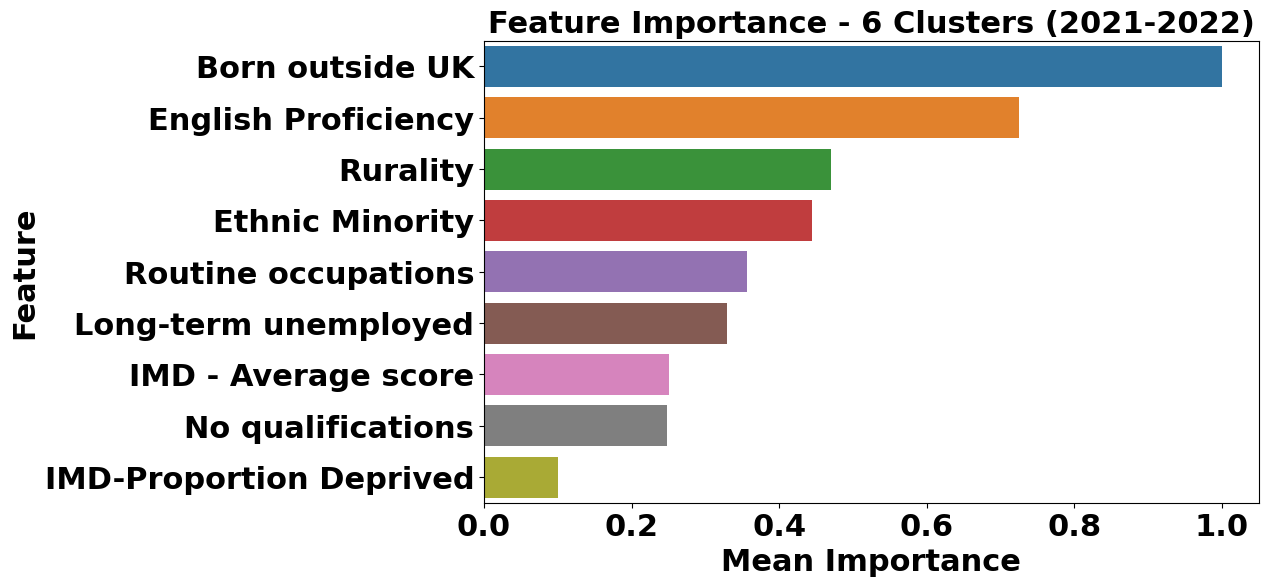

In [198]:

import seaborn as sns
import matplotlib.pyplot as plt

# Example: custom color list (must match number of features)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'][:len(feature_importance_df)]

plt.figure(figsize=(10, 6))
sns.barplot(x='Mean Importance (norm 0.1-1.0)', y='Feature', data=feature_importance_df, palette=colors)

# Customize title and axis labels
plt.title('Feature Importance - 6 Clusters (2021-2022)', fontsize=22, fontweight='bold')
plt.xlabel('Mean Importance', fontsize=22, fontweight='bold')  # Bold x-axis label
plt.ylabel('Feature', fontsize=22, fontweight='bold')  # Bold y-axis label
plt.xticks(fontsize=22,fontweight='bold')
plt.yticks(fontsize=22,fontweight='bold')
# Save the plot as an image
plt.savefig("feature_importance_plot_6_clusters_2021-22.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# 6. Hypothesis testing

### 6.1. Two Clusters

In [44]:
class_data=pd.merge(demographic_data, b, on='OrgCode')

In [45]:
class_data

,OrgCode,OrgName,IMD - Average score,IMD-Proportion Deprived,Born outside UK,No qualifications,Routine occupations,Long-term unemployed,Rurality,English Proficiency,Ethnic Minority,cluster
0,E06000001,Hartlepool,35.037,0.3621,0.039650,0.231449,0.157165,0.141004,3,0.020980,0.035413,0
1,E06000002,Middlesbrough,40.460,0.4884,0.122881,0.239444,0.150608,0.153241,3,0.075718,0.176311,0
2,E06000003,Redcar and Cleveland,29.792,0.2386,0.029144,0.220149,0.149438,0.123819,4,0.010991,0.023013,0
3,E06000004,Stockton-on-Tees,25.790,0.2083,0.062397,0.186324,0.141004,0.113626,3,0.029750,0.079637,0
4,E06000005,Darlington,25.657,0.1846,0.078164,0.192629,0.152080,0.102060,3,0.042083,0.056319,0
...,...,...,...,...,...,...,...,...,...,...,...,...
145,E10000030,Surrey,10.087,0.0000,0.179225,0.128561,0.067494,0.054904,1,0.069352,0.145016,0
146,E10000031,Warwickshire,15.640,0.0177,0.125152,0.168685,0.127284,0.063482,4,0.069296,0.109085,0
147,E10000032,West Sussex,14.429,0.0099,0.129064,0.157601,0.095401,0.060295,3,0.058180,0.089676,0
148,E10000034,Worcestershire,18.089,0.0495,0.080332,0.180093,0.119641,0.065772,4,0.043612,0.061609,0


In [46]:
import scipy.stats as stats
import pandas as pd

In [47]:
X=class_data.drop(['OrgCode','OrgName'],axis=1)
feature_names = X.columns
feature_names[0]

'IMD - Average score'

In [48]:
# Separate groups to check whether the distribution withing each group is normal -> It was not after plotting
df=X.copy()
group1 = df[df['cluster'] == 0][feature_names[1]]
group2 = df[df['cluster'] == 1][feature_names[1]]

Text(0, 0.5, 'Frequency')

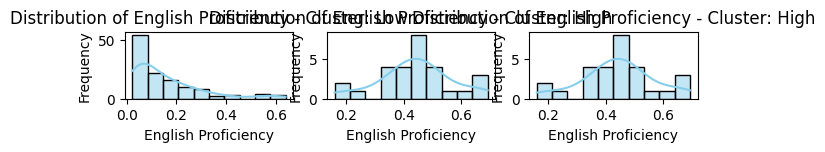

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Example DataFrame
# # Replace this with your actual data
# df = pd.DataFrame({
#     'cluster': ['Low', 'Low', 'Low', 'High', 'High', 'High'],
#     'english_proficiency': [61, 65, 63, 78, 80, 76]
# })

# # Choose the cluster to analyse
cluster_name1 = 'Low'
cluster_name2 = 'High'
# data = df[df['cluster'] == cluster_name]['english_proficiency']

# Plot histogram and KDE (density plot)
plt.figure(figsize=(10, 4))

plt.subplot(441)
sns.histplot(group1, kde=True, bins=10, color='skyblue')
plt.title(f'Distribution of English Proficiency - Cluster: {cluster_name1}')
plt.xlabel('English Proficiency')
plt.ylabel('Frequency')
plt.subplot(442)
sns.histplot(group2, kde=True, bins=10, color='skyblue')
plt.title(f'Distribution of English Proficiency - Cluster: {cluster_name2}')
plt.xlabel('English Proficiency')
plt.ylabel('Frequency')
plt.subplot(443)
sns.histplot(group2, kde=True, bins=10, color='skyblue')
plt.title(f'Distribution of English Proficiency - Cluster: {cluster_name2}')
plt.xlabel('English Proficiency')
plt.ylabel('Frequency')


In [53]:
from scipy.stats import mannwhitneyu # Using Mann Whitney test since the distribution is not normal
# Two clusters
df=X.copy()
p_values={}
for i in range(len(feature_names)-1):
  group1 = df[df['cluster'] == 0][feature_names[i]]
  group2 = df[df['cluster'] == 1][feature_names[i]]
  stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
  p_values[feature_names[i]]=p_value

In [54]:
# P values Mann Whitney
p_values

{'IMD - Average score': np.float64(0.04303488852664943),
 'IMD-Proportion Deprived': np.float64(0.04229500771024115),
 'Born outside UK': np.float64(1.8678919112399708e-13),
 'No qualifications': np.float64(0.02414040595927426),
 'Routine occupations': np.float64(1.3617474762136646e-06),
 'Long-term unemployed': np.float64(0.00012956750063747492),
 'Rurality': np.float64(1.551793462997717e-08),
 'English Proficiency': np.float64(9.2736448600178e-13),
 'Ethnic Minority': np.float64(4.7056498624227e-12)}

In [ ]:
# # P values one way anova
# p_values

{'IMD - Average score': 0.04249592327498876,
 'IMD-Proportion Deprived': 0.2588157824187294,
 'Born outside UK': 2.6484722382746148e-24,
 'No qualifications': 0.012971616726602093,
 'Routine occupations': 7.510225737017803e-07,
 'Long-term unemployed': 7.969740982933458e-05,
 'Rurality': 5.710418753309704e-09,
 'English Proficiency': 6.805431153073487e-19,
 'Ethnic Minority': 1.0679385317470253e-17}

#### Calculating p value for Rurality

In [55]:
import pandas as pd
import scipy.stats as stats

In [56]:
contingency_table = pd.crosstab(df['Rurality'], df['cluster'])
print(contingency_table)

cluster    0   1
Rurality        
1         38  26
2          4   1
3         38   1
4         22   0
5         17   0
6          3   0


In [58]:
# Rurality p value
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-square statistic: 36.63149094757701
P-value: 7.099588389870672e-07
Degrees of freedom: 5
Expected frequencies:
[[52.05333333 11.94666667]
 [ 4.06666667  0.93333333]
 [31.72        7.28      ]
 [17.89333333  4.10666667]
 [13.82666667  3.17333333]
 [ 2.44        0.56      ]]


In [59]:
# Final p value
p_values["Rurality"]=p
p_values

{'IMD - Average score': np.float64(0.04303488852664943),
 'IMD-Proportion Deprived': np.float64(0.04229500771024115),
 'Born outside UK': np.float64(1.8678919112399708e-13),
 'No qualifications': np.float64(0.02414040595927426),
 'Routine occupations': np.float64(1.3617474762136646e-06),
 'Long-term unemployed': np.float64(0.00012956750063747492),
 'Rurality': np.float64(7.099588389870672e-07),
 'English Proficiency': np.float64(9.2736448600178e-13),
 'Ethnic Minority': np.float64(4.7056498624227e-12)}

In [ ]:
# Calculate Cramér's V
n = np.sum(contingency_table.values)
cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V: {cramer_v}")

Cramér's V: 0.49417602091816776


### 6.2. Three Clusters

In [150]:
class_data2=pd.merge(demographic_data, b3, on='OrgCode')

In [151]:
class_data2

,OrgCode,OrgName,IMD - Average score,IMD-Proportion Deprived,Born outside UK,No qualifications,Routine occupations,Long-term unemployed,Rurality,English Proficiency,Ethnic Minority,cluster2
0,E06000001,Hartlepool,35.037,0.3621,0.039650,0.231449,0.157165,0.141004,3,0.020980,0.035413,1
1,E06000002,Middlesbrough,40.460,0.4884,0.122881,0.239444,0.150608,0.153241,3,0.075718,0.176311,2
2,E06000003,Redcar and Cleveland,29.792,0.2386,0.029144,0.220149,0.149438,0.123819,4,0.010991,0.023013,1
3,E06000004,Stockton-on-Tees,25.790,0.2083,0.062397,0.186324,0.141004,0.113626,3,0.029750,0.079637,1
4,E06000005,Darlington,25.657,0.1846,0.078164,0.192629,0.152080,0.102060,3,0.042083,0.056319,1
...,...,...,...,...,...,...,...,...,...,...,...,...
145,E10000030,Surrey,10.087,0.0000,0.179225,0.128561,0.067494,0.054904,1,0.069352,0.145016,2
146,E10000031,Warwickshire,15.640,0.0177,0.125152,0.168685,0.127284,0.063482,4,0.069296,0.109085,1
147,E10000032,West Sussex,14.429,0.0099,0.129064,0.157601,0.095401,0.060295,3,0.058180,0.089676,1
148,E10000034,Worcestershire,18.089,0.0495,0.080332,0.180093,0.119641,0.065772,4,0.043612,0.061609,1


In [152]:
X2=class_data2.drop(['OrgCode','OrgName'],axis=1)
feature_names2 = X2.columns
feature_names2[0]

'IMD - Average score'

In [153]:
from scipy.stats import kruskal #   Kruskal–Wallis H Test (for more than 2 groups)
df2=X2.copy()
p_values2={}
for i in range(len(feature_names2)-1):
  group1 = df2[df2['cluster2'] == 0][feature_names2[i]]
  group2 = df2[df2['cluster2'] == 1][feature_names2[i]]
  group3 = df2[df2['cluster2'] == 2][feature_names2[i]]
  stat, p_value = kruskal(group1, group2, group3)
  p_values2[feature_names2[i]]=p_value

In [154]:
# P values Kruskal–Wallis H Test
p_values2

{'IMD - Average score': np.float64(0.029349753468436428),
 'IMD-Proportion Deprived': np.float64(0.1259834007895784),
 'Born outside UK': np.float64(6.696282822325773e-19),
 'No qualifications': np.float64(0.02257721372258673),
 'Routine occupations': np.float64(6.882483798046582e-06),
 'Long-term unemployed': np.float64(1.1835200916344346e-06),
 'Rurality': np.float64(3.0310342907332684e-12),
 'English Proficiency': np.float64(4.771294818091529e-19),
 'Ethnic Minority': np.float64(5.232261964167399e-18)}

In [ ]:
# # P values one way anova
# p_values2

{'IMD - Average score': 0.028118135215292064,
 'IMD-Proportion Deprived': 0.4040479855656034,
 'Born outside UK': 5.173752575254923e-34,
 'No qualifications': 0.012461956830785234,
 'Routine occupations': 3.772194944932816e-06,
 'Long-term unemployed': 4.746596293410899e-07,
 'Rurality': 3.3274165173430225e-14,
 'English Proficiency': 3.3473258676738864e-29,
 'Ethnic Minority': 1.4257619231871768e-28}

*  Calculating p value for Rurality

In [155]:
contingency_table2 = pd.crosstab(df2['Rurality'], df2['cluster2'])
print(contingency_table2)

cluster2   0   1   2
Rurality            
1         26  17  21
2          1   3   1
3          1  28  10
4          0  20   2
5          0  16   1
6          0   3   0


In [156]:
df2=X2.copy()
contingency_table2 = pd.crosstab(df2['Rurality'], df2['cluster2'])
print(contingency_table2)

cluster2   0   1   2
Rurality            
1         26  17  21
2          1   3   1
3          1  28  10
4          0  20   2
5          0  16   1
6          0   3   0


In [157]:
# Rurality p value
import scipy.stats as stats
chi2, p, dof, expected = stats.chi2_contingency(contingency_table2)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 58.23480502340796
P-value: 7.807750485644207e-09
Degrees of freedom: 10
Expected frequencies:
[[11.94666667 37.12       14.93333333]
 [ 0.93333333  2.9         1.16666667]
 [ 7.28       22.62        9.1       ]
 [ 4.10666667 12.76        5.13333333]
 [ 3.17333333  9.86        3.96666667]
 [ 0.56        1.74        0.7       ]]


In [159]:
# Final p values
p_values2 ["Rurality"]=p
p_values2

{'IMD - Average score': np.float64(0.029349753468436428),
 'IMD-Proportion Deprived': np.float64(0.1259834007895784),
 'Born outside UK': np.float64(6.696282822325773e-19),
 'No qualifications': np.float64(0.02257721372258673),
 'Routine occupations': np.float64(6.882483798046582e-06),
 'Long-term unemployed': np.float64(1.1835200916344346e-06),
 'Rurality': np.float64(7.807750485644207e-09),
 'English Proficiency': np.float64(4.771294818091529e-19),
 'Ethnic Minority': np.float64(5.232261964167399e-18)}

In [ ]:
# # Calculate Cramér's V
# n = np.sum(contingency_table2.values)
# cramer_v = np.sqrt(chi2 / (n * (min(contingency_table2.shape) - 1)))

# print(f"Cramér's V: {cramer_v}")

Cramér's V: 0.4405859924517497


### 6.3. Six Clusters

In [199]:
class_data3=pd.merge(demographic_data, b6, on='OrgCode')

In [200]:
class_data3

,OrgCode,OrgName,IMD - Average score,IMD-Proportion Deprived,Born outside UK,No qualifications,Routine occupations,Long-term unemployed,Rurality,English Proficiency,Ethnic Minority,cluster3
0,E06000001,Hartlepool,35.037,0.3621,0.039650,0.231449,0.157165,0.141004,3,0.020980,0.035413,2
1,E06000002,Middlesbrough,40.460,0.4884,0.122881,0.239444,0.150608,0.153241,3,0.075718,0.176311,0
2,E06000003,Redcar and Cleveland,29.792,0.2386,0.029144,0.220149,0.149438,0.123819,4,0.010991,0.023013,5
3,E06000004,Stockton-on-Tees,25.790,0.2083,0.062397,0.186324,0.141004,0.113626,3,0.029750,0.079637,5
4,E06000005,Darlington,25.657,0.1846,0.078164,0.192629,0.152080,0.102060,3,0.042083,0.056319,2
...,...,...,...,...,...,...,...,...,...,...,...,...
145,E10000030,Surrey,10.087,0.0000,0.179225,0.128561,0.067494,0.054904,1,0.069352,0.145016,0
146,E10000031,Warwickshire,15.640,0.0177,0.125152,0.168685,0.127284,0.063482,4,0.069296,0.109085,2
147,E10000032,West Sussex,14.429,0.0099,0.129064,0.157601,0.095401,0.060295,3,0.058180,0.089676,2
148,E10000034,Worcestershire,18.089,0.0495,0.080332,0.180093,0.119641,0.065772,4,0.043612,0.061609,5


In [201]:
X3=class_data3.drop(['OrgCode','OrgName'],axis=1)
feature_names3 = X3.columns
feature_names3[0]

'IMD - Average score'

In [202]:
# Six clusters
from scipy.stats import kruskal #   Kruskal–Wallis H Test (for more than 2 groups)

df3=X3.copy()
p_values3={}
for i in range(len(feature_names3)-1):
 group1 = df3[df3['cluster3'] == 0][feature_names3[i]]
 group2 = df3[df3['cluster3'] == 1][feature_names3[i]]
 group3 = df3[df3['cluster3'] == 2][feature_names3[i]]
 group4 = df3[df3['cluster3'] == 3][feature_names3[i]]
 group5 = df3[df3['cluster3'] == 4][feature_names3[i]]
 group6 = df3[df3['cluster3'] == 5][feature_names3[i]]
 stat, p_value = kruskal(group1, group2, group3,group4, group5, group6)
 p_values3[feature_names3[i]]=p_value

In [203]:
# P values Kruskal–Wallis H Test
p_values3

{'IMD - Average score': np.float64(0.08751288224952669),
 'IMD-Proportion Deprived': np.float64(0.2198091457123171),
 'Born outside UK': np.float64(4.145189365513335e-18),
 'No qualifications': np.float64(0.12035541911844537),
 'Routine occupations': np.float64(9.347892327895763e-05),
 'Long-term unemployed': np.float64(1.854984546376168e-05),
 'Rurality': np.float64(1.304143244819768e-10),
 'English Proficiency': np.float64(1.0782737583643434e-18),
 'Ethnic Minority': np.float64(4.951137742377873e-17)}

In [ ]:
# # P values one way anova
# p_values3

{'IMD - Average score': 0.05848581029010224,
 'IMD-Proportion Deprived': 0.22351703911317766,
 'Born outside UK': 1.2129621837051887e-33,
 'No qualifications': 0.07845471486431421,
 'Routine occupations': 5.693391603977638e-05,
 'Long-term unemployed': 9.278355255030242e-06,
 'Rurality': 1.7384705635268592e-12,
 'English Proficiency': 5.089534504047518e-29,
 'Ethnic Minority': 2.4027071317944784e-27}

*  Calculating p value for Rurality

In [204]:
contingency_table3 = pd.crosstab(df3['Rurality'], df3['cluster3'])
print(contingency_table3)

cluster3   0   1   2  3   4  5
Rurality                      
1         21  12  13  1  13  4
2          1   0   1  0   1  2
3         10   0  19  0   1  9
4          2   0  11  0   0  9
5          1   0   8  0   0  8
6          0   0   2  0   0  1


In [205]:
df3=X3.copy()
contingency_table3 = pd.crosstab(df3['Rurality'], df3['cluster3'])
print(contingency_table3)

cluster3   0   1   2  3   4  5
Rurality                      
1         21  12  13  1  13  4
2          1   0   1  0   1  2
3         10   0  19  0   1  9
4          2   0  11  0   0  9
5          1   0   8  0   0  8
6          0   0   2  0   0  1


In [206]:
# Rurality p value
chi2, p, dof, expected = stats.chi2_contingency(contingency_table3)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 64.158284139484
P-value: 2.7295373588765875e-05
Degrees of freedom: 25
Expected frequencies:
[[1.49333333e+01 5.12000000e+00 2.30400000e+01 4.26666667e-01
  6.40000000e+00 1.40800000e+01]
 [1.16666667e+00 4.00000000e-01 1.80000000e+00 3.33333333e-02
  5.00000000e-01 1.10000000e+00]
 [9.10000000e+00 3.12000000e+00 1.40400000e+01 2.60000000e-01
  3.90000000e+00 8.58000000e+00]
 [5.13333333e+00 1.76000000e+00 7.92000000e+00 1.46666667e-01
  2.20000000e+00 4.84000000e+00]
 [3.96666667e+00 1.36000000e+00 6.12000000e+00 1.13333333e-01
  1.70000000e+00 3.74000000e+00]
 [7.00000000e-01 2.40000000e-01 1.08000000e+00 2.00000000e-02
  3.00000000e-01 6.60000000e-01]]


In [207]:
# Final p value
p_values3 ["Rurality"]=p
p_values3

{'IMD - Average score': np.float64(0.08751288224952669),
 'IMD-Proportion Deprived': np.float64(0.2198091457123171),
 'Born outside UK': np.float64(4.145189365513335e-18),
 'No qualifications': np.float64(0.12035541911844537),
 'Routine occupations': np.float64(9.347892327895763e-05),
 'Long-term unemployed': np.float64(1.854984546376168e-05),
 'Rurality': np.float64(2.7295373588765875e-05),
 'English Proficiency': np.float64(1.0782737583643434e-18),
 'Ethnic Minority': np.float64(4.951137742377873e-17)}

In [ ]:
# # Calculate Cramér's V
# n = np.sum(contingency_table3.values)
# cramer_v = np.sqrt(chi2 / (n * (min(contingency_table3.shape) - 1)))

# print(f"Cramér's V: {cramer_v}")

Cramér's V: 0.29247970673645945


# 7. Box Plot

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
print(demographic_data.columns)

Index(['OrgCode', 'OrgName', 'IMD - Average score', 'IMD-Proportion Deprived',
       'Born outside UK', 'No qualifications', 'Routine occupations',
       'Long-term unemployed', 'Rurality', 'English Proficiency',
       'Ethnic Minority'],
      dtype='object')


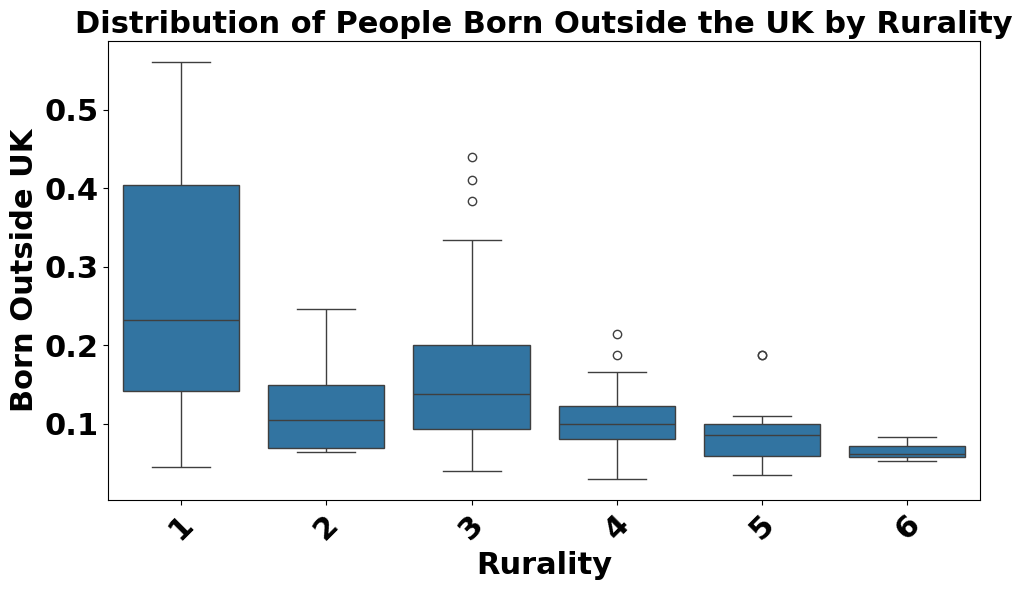

In [62]:
#### Dis
import seaborn as sns
import matplotlib.pyplot as plt

# Assume your DataFrame is named df
df=demographic_data.copy()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rurality', y='Born outside UK', data=df)

# Optional: Make labels bold
plt.xlabel('Rurality', fontsize=22, fontweight='bold')
plt.ylabel('Born Outside UK', fontsize=22, fontweight='bold')
plt.title('Distribution of People Born Outside the UK by Rurality', fontsize=22, fontweight='bold')

# Optional: Rotate x-axis labels for readability if needed
plt.xticks(rotation=45, fontsize=22, fontweight='bold')
plt.yticks(fontsize=22, fontweight='bold')
plt.tight_layout()
plt.show()

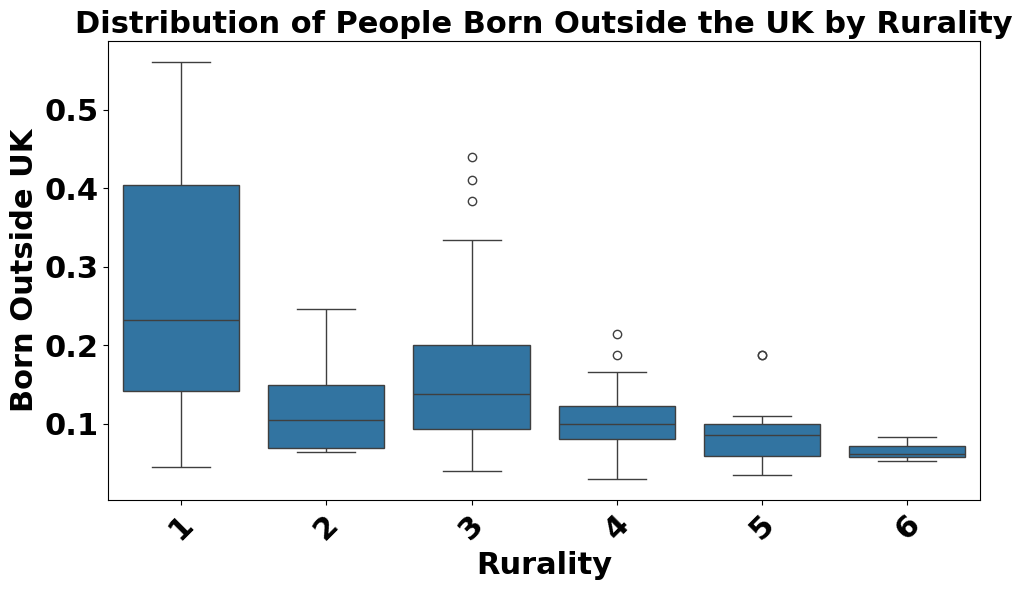

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume your DataFrame is named df
df=demographic_data.copy()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rurality', y='Born outside UK', data=df)

# Optional: Make labels bold
plt.xlabel('Rurality', fontsize=22, fontweight='bold')
plt.ylabel('Born Outside UK', fontsize=22, fontweight='bold')
plt.title('Distribution of People Born Outside the UK by Rurality', fontsize=22, fontweight='bold')

# Optional: Rotate x-axis labels for readability if needed
plt.xticks(rotation=45, fontsize=22, fontweight='bold')
plt.yticks(fontsize=22, fontweight='bold')
plt.tight_layout()
plt.show()

### 7.1. Two Clusters

In [64]:
# Create the box plot
#plt.figure(figsize=(8, 6))
# sns.boxplot(x='cluster', y='IMD - Proportion of LSOAs in most deprived 10% nationally ', data=df)
#sns.boxplot(x='cluster', y='Born outside UK', data=df,medianprops={'color': 'black', 'linewidth': 2.5})
# sns.boxplot(x='cluster', y='% Ethnic minority', data=df)
# sns.boxplot(x='cluster', y='No qualifications ', data=df)

# Display the plot
#plt.title('Box Plot of Continuous Value by Category')
#plt.show()
df=class_data.copy()

In [65]:
df['cluster'] = df['cluster'].map({0: 1, 1: 0})
df['cluster'] = df['cluster'].map({0: 'Low coverage', 1: 'High coverage'})
# df['cluster'] = df['cluster'].astype(int)

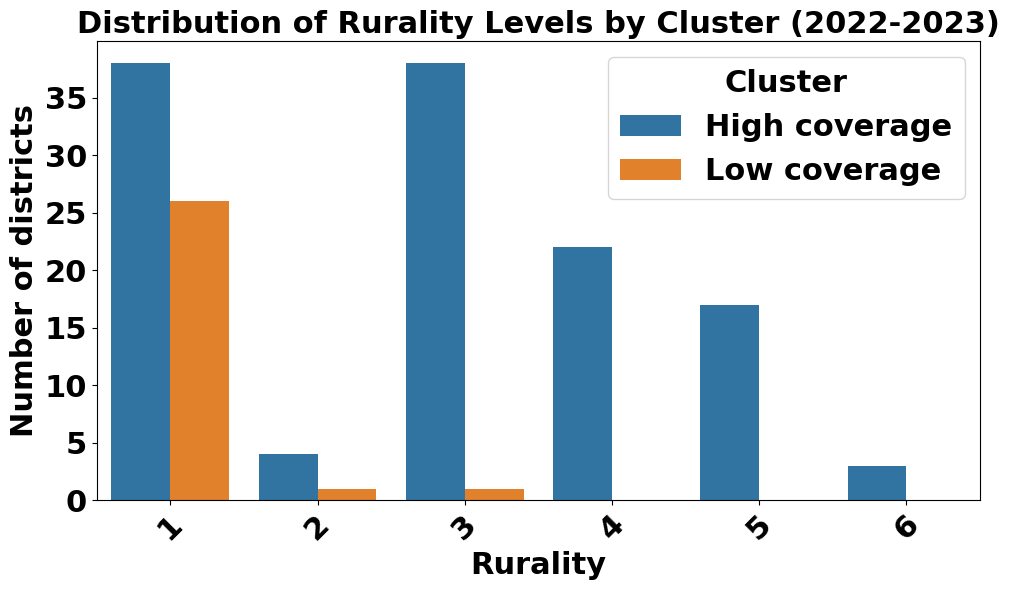

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Countplot with hue for cluster (0 vs 1)
sns.countplot(data=df, x='Rurality', hue='cluster')

# Labels and title
plt.title('Distribution of Rurality Levels by Cluster (2022-2023)', fontsize=22, fontweight='bold')
plt.xlabel('Rurality', fontsize=22, fontweight='bold')
plt.ylabel('Number of districts', fontsize=22, fontweight='bold')
plt.xticks(rotation=45, fontsize=22, fontweight='bold')
plt.yticks(fontsize=22, fontweight='bold')
plt.legend(title='Cluster', title_fontsize=22, fontsize=22 )
for text in plt.gca().get_legend().get_texts():
    text.set_fontweight('bold')
plt.gca().get_legend().get_title().set_fontweight('bold')
plt.tight_layout()
# file_name = feature.strip().replace(' ', '_').replace('%', 'Percent').replace('-', '_') + "_box_plot_2_clusters_2023_2024.png"
# plt.savefig(file_name, dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Countplot with hue for cluster (0 vs 1)
sns.countplot(data=df, x='Rurality', hue='cluster')

# Labels and title
plt.title('Distribution of Rurality Levels by Cluster (2023-2024)', fontsize=22, fontweight='bold')
plt.xlabel('Rurality', fontsize=22, fontweight='bold')
plt.ylabel('Number of districts', fontsize=22, fontweight='bold')
plt.xticks(rotation=45, fontsize=22, fontweight='bold')
plt.yticks(fontsize=22, fontweight='bold')
plt.legend(title='Cluster', title_fontsize=22, fontsize=22 )
for text in plt.gca().get_legend().get_texts():
    text.set_fontweight('bold')
plt.gca().get_legend().get_title().set_fontweight('bold')

plt.tight_layout()
# file_name = feature.strip().replace(' ', '_').replace('%', 'Percent').replace('-', '_') + "_box_plot_2_clusters_2023_2024.png"
# plt.savefig(file_name, dpi=300, bbox_inches='tight')
plt.show()

<ipython-input-355-186b7995c50a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 3},palette=cluster_palette)


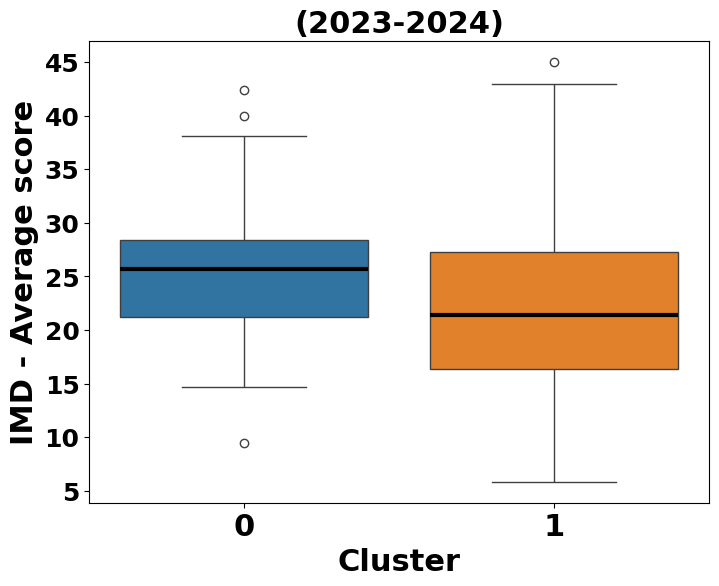

<ipython-input-355-186b7995c50a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 3},palette=cluster_palette)


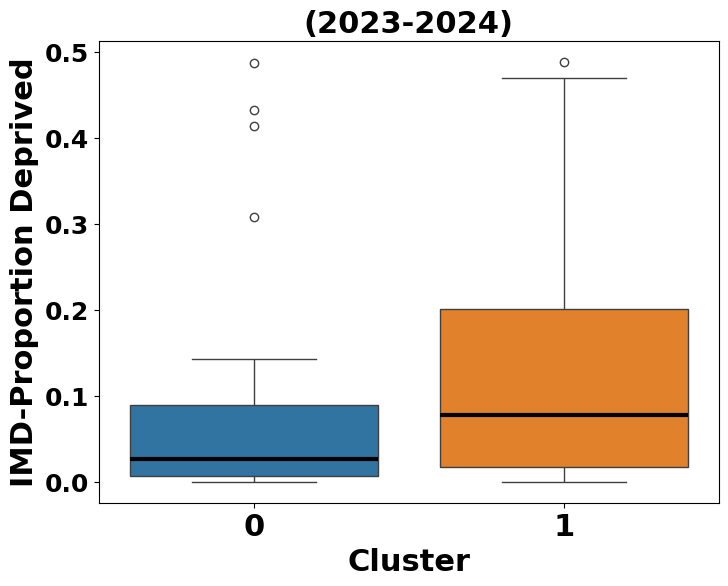

<ipython-input-355-186b7995c50a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 3},palette=cluster_palette)


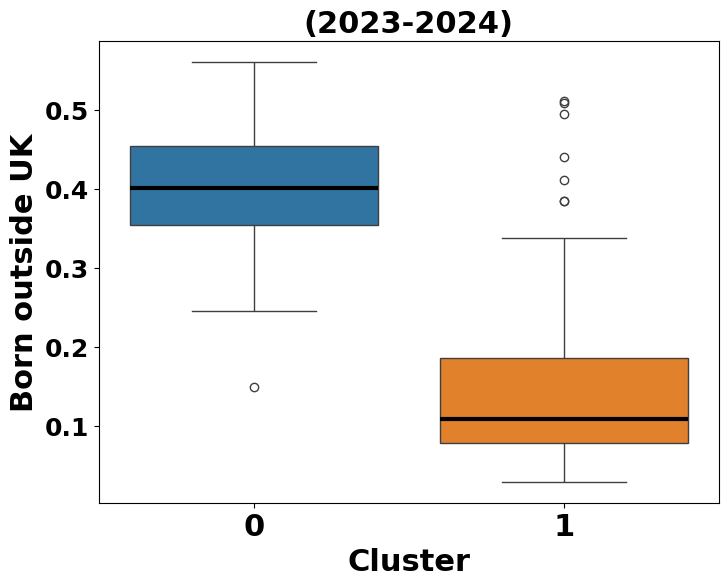

<ipython-input-355-186b7995c50a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 3},palette=cluster_palette)


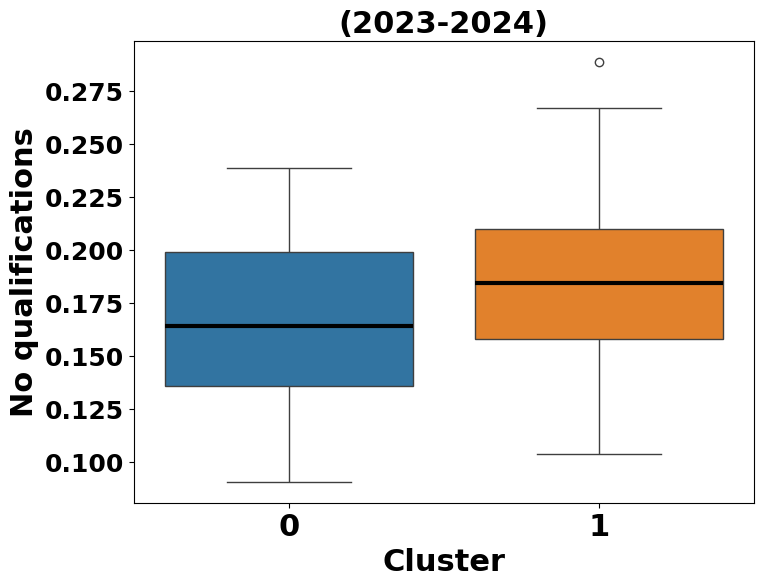

<ipython-input-355-186b7995c50a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 3},palette=cluster_palette)


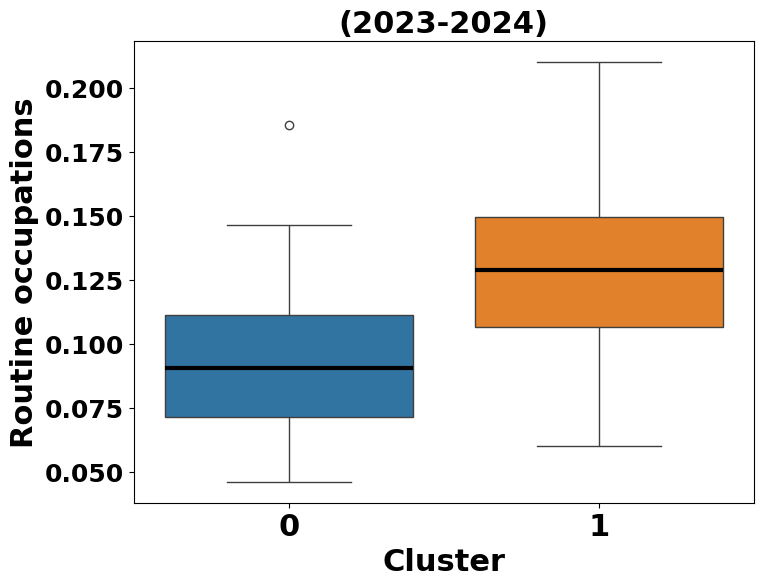

<ipython-input-355-186b7995c50a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 3},palette=cluster_palette)


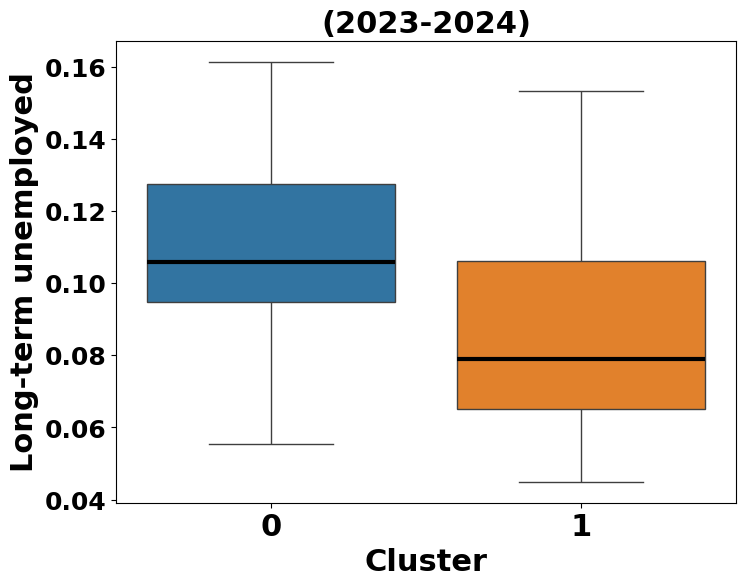

<ipython-input-355-186b7995c50a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 3},palette=cluster_palette)


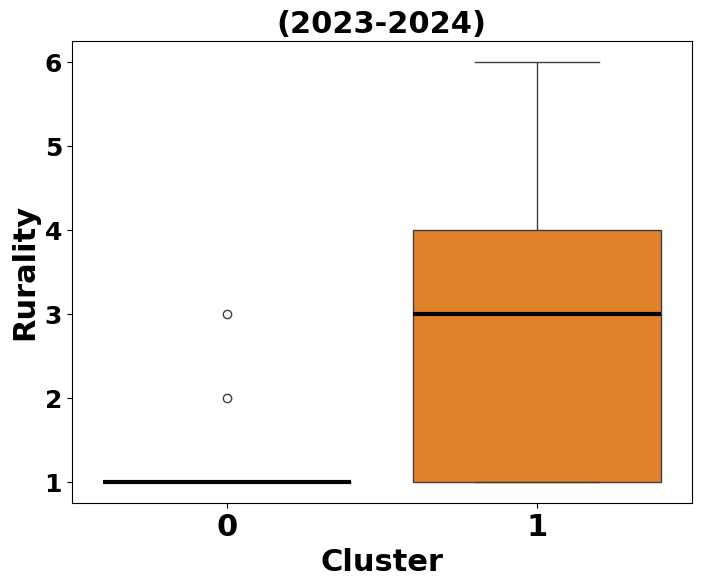

<ipython-input-355-186b7995c50a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 3},palette=cluster_palette)


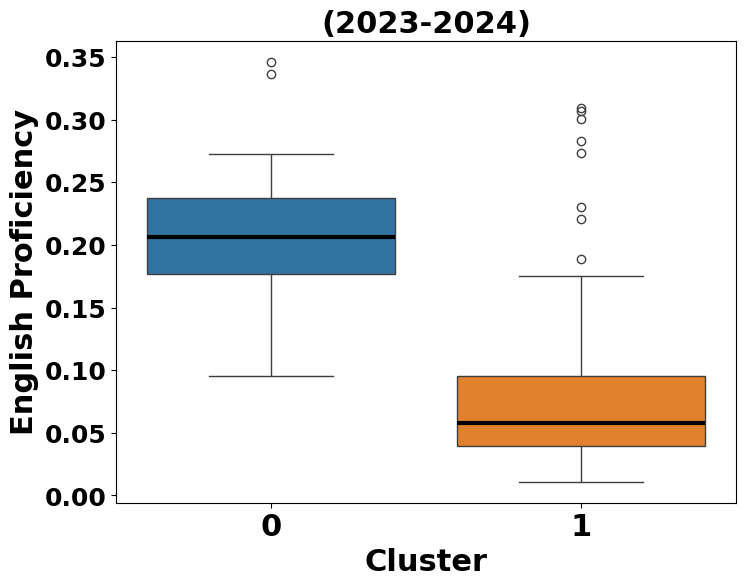

<ipython-input-355-186b7995c50a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 3},palette=cluster_palette)


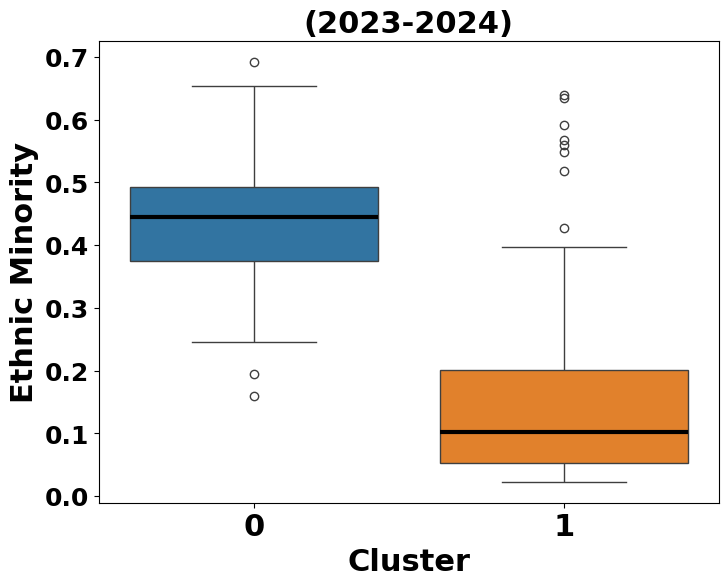

In [ ]:
# List of features to create box plots for
features = [
    'IMD - Average score',
    'IMD-Proportion Deprived',
    'Born outside UK',
    'No qualifications',
    'Routine occupations',
    'Long-term unemployed',
    'Rurality',
    'English Proficiency',
    'Ethnic Minority'
]
cluster_palette = {'0': '#1f77b4', '1': '#ff7f0e'}

# Loop through each feature and create a box plot
for feature in features:
    plt.figure(figsize=(8, 6))

    # Create the box plot
    sns.boxplot(x='cluster', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 3},palette=cluster_palette)

    # Customize the title and labels
    plt.title(f'(2023-2024)', fontsize=22, fontweight='bold')
    plt.xlabel('Cluster', fontsize=22, fontweight='bold')
    plt.ylabel(feature, fontsize=22, fontweight='bold')
    plt.xticks(fontsize=22,fontweight='bold')
    plt.yticks(fontsize=18,fontweight='bold')
    # Save each plot as an image
    file_name = feature.strip().replace(' ', '_').replace('%', 'Percent').replace('-', '_') + "_box_plot_2_clusters_2023_2024.png"
    plt.savefig(file_name, dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()


### 7.2. Three Clusters

In [ ]:
df=class_data2.copy()
df['cluster2'] = df['cluster2'].map({0:0, 1: 2, 2: 1})
df['cluster2'] = df['cluster2'].astype(int)

<ipython-input-112-04e754921c5d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster2', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)


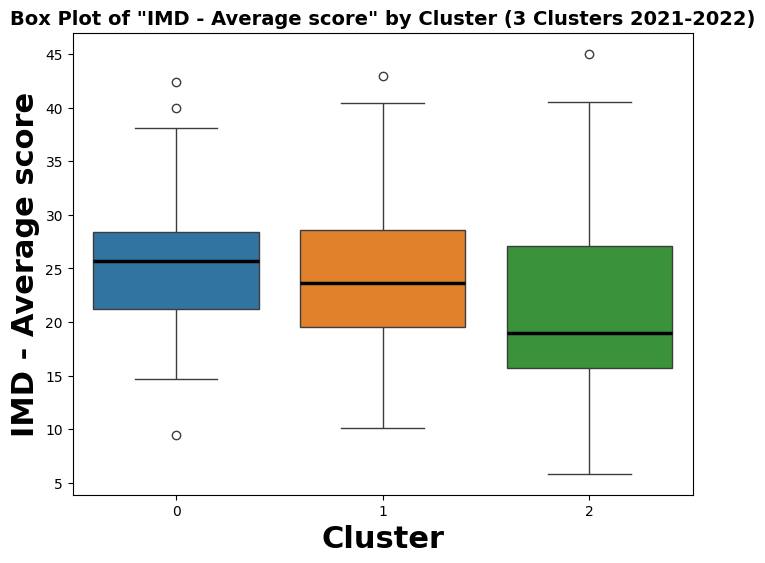

<ipython-input-112-04e754921c5d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster2', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)


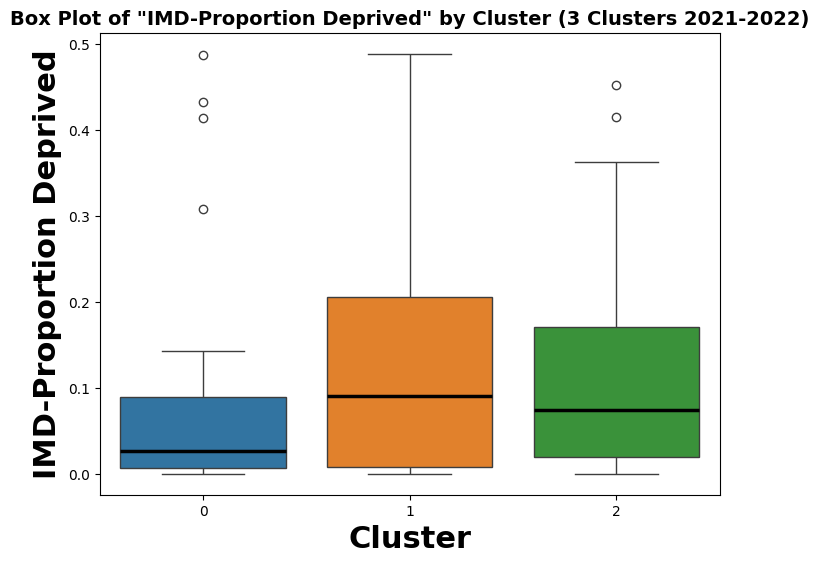

<ipython-input-112-04e754921c5d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster2', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)


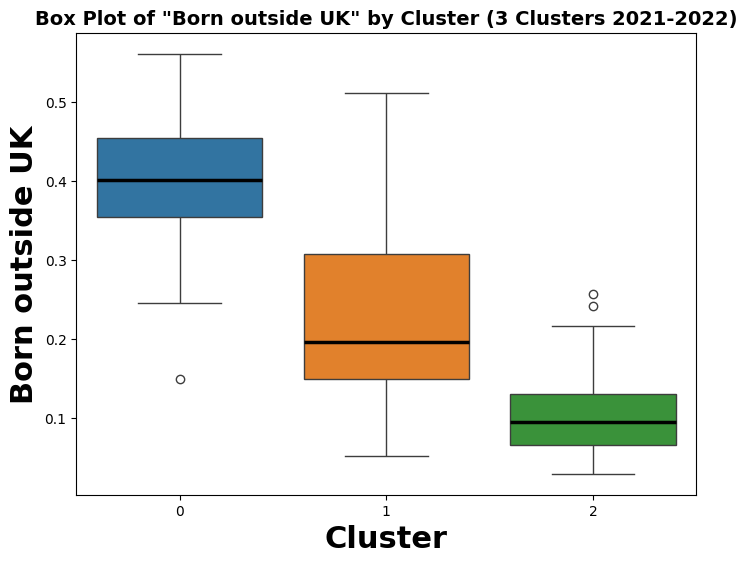

<ipython-input-112-04e754921c5d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster2', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)


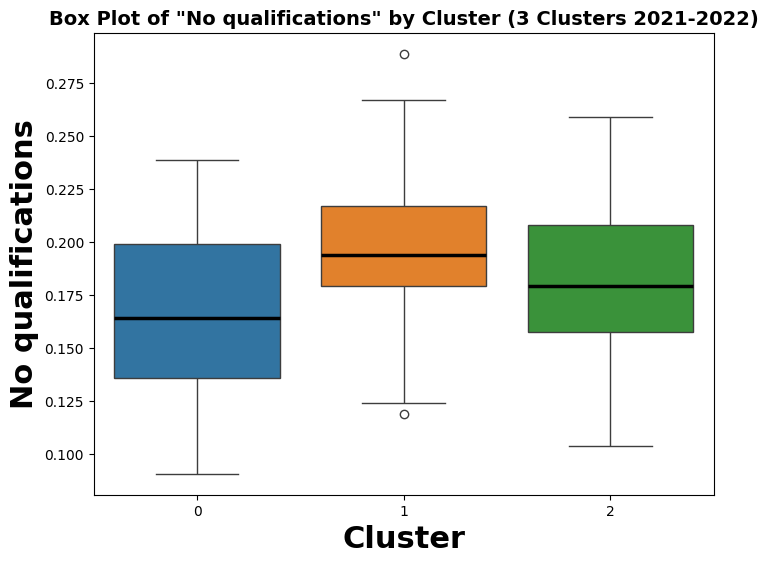

<ipython-input-112-04e754921c5d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster2', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)


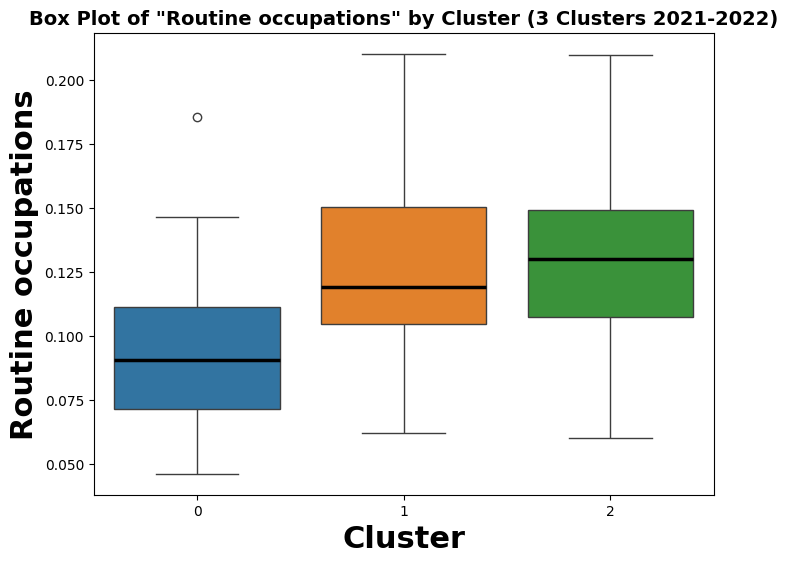

<ipython-input-112-04e754921c5d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster2', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)


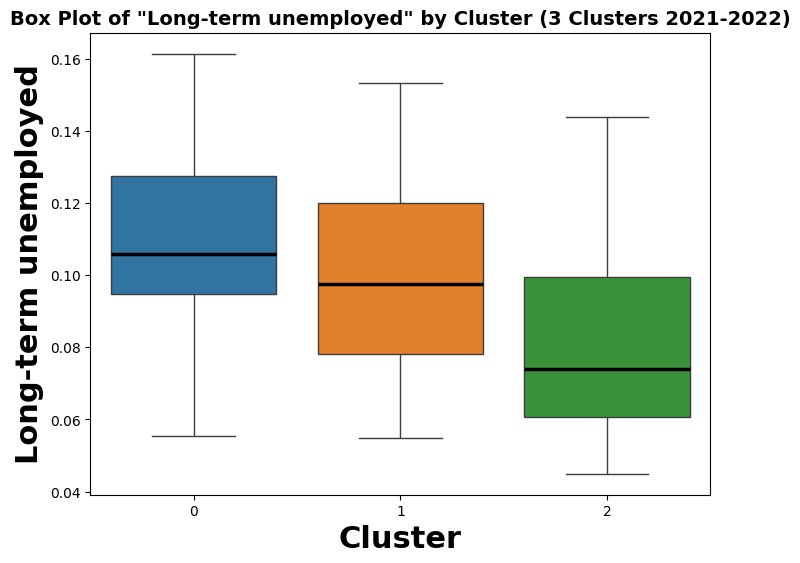

<ipython-input-112-04e754921c5d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster2', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)


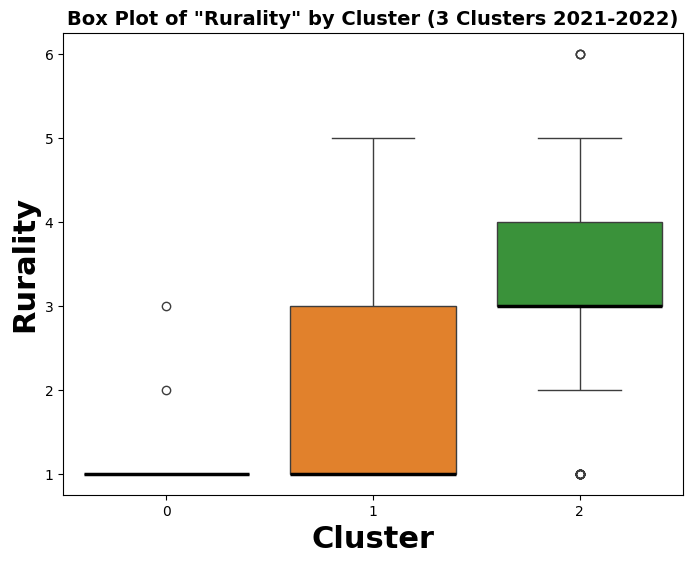

<ipython-input-112-04e754921c5d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster2', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)


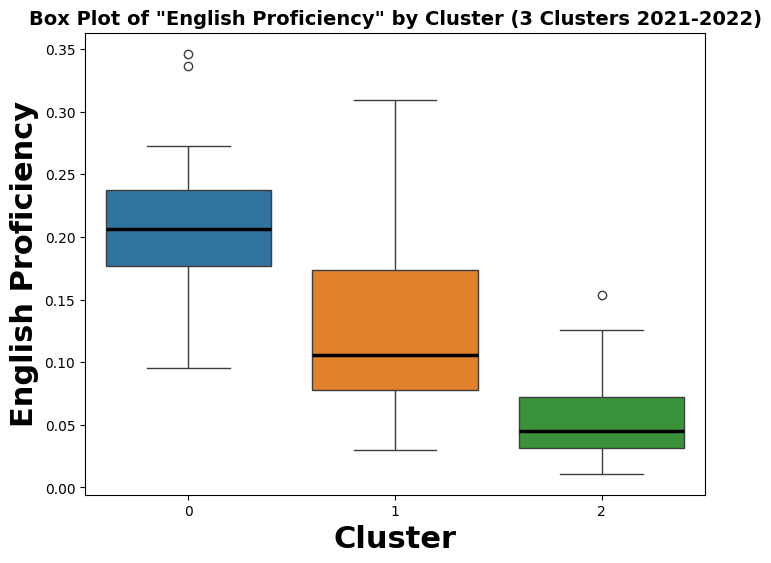

<ipython-input-112-04e754921c5d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster2', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)


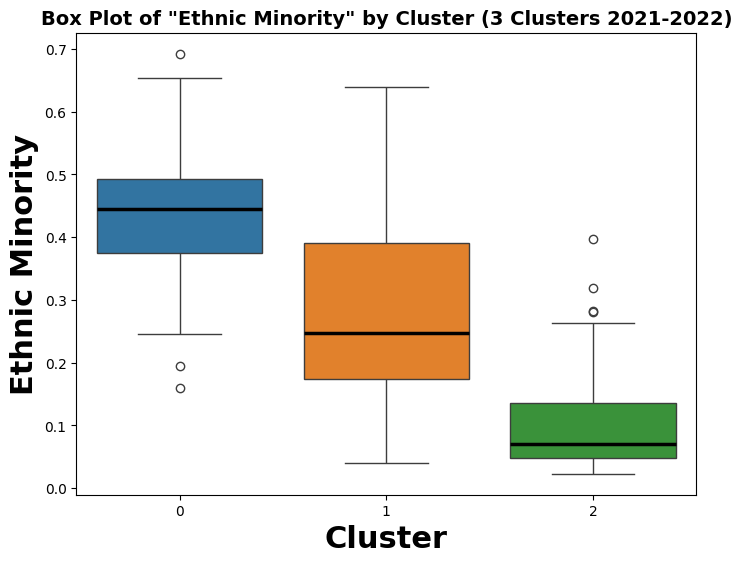

In [ ]:
# List of features to create box plots for
features = [
    'IMD - Average score',
    'IMD-Proportion Deprived',
    'Born outside UK',
    'No qualifications',
    'Routine occupations',
    'Long-term unemployed',
    'Rurality',
    'English Proficiency',
    'Ethnic Minority'
]
cluster_palette = {'0': '#1f77b4', '1': '#ff7f0e', '2':'#2ca02c'}

# Loop through each feature and create a box plot
for feature in features:
    plt.figure(figsize=(8, 6))

    # Create the box plot
    sns.boxplot(x='cluster2', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)

    # Customize the title and labels
    plt.title(f'Box Plot of "{feature}" by Cluster (3 Clusters 2021-2022)', fontsize=14, fontweight='bold')
    plt.xlabel('Cluster', fontsize=22, fontweight='bold')
    plt.ylabel(feature, fontsize=22, fontweight='bold')

    # Save each plot as an image
    file_name = feature.strip().replace(' ', '_').replace('%', 'Percent').replace('-', '_') + "_box_plot_3_clusters_2021_2022.png"
    plt.savefig(file_name, dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()


### 7.3. Six Clusters

In [208]:
df=class_data3.copy()
df['cluster3'] = df['cluster3'].map({0:3, 1:1, 2:4, 3:0,4:2,5:5})
df['cluster3'] = df['cluster3'].astype(int)


/tmp/ipython-input-1656575755.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster3', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)


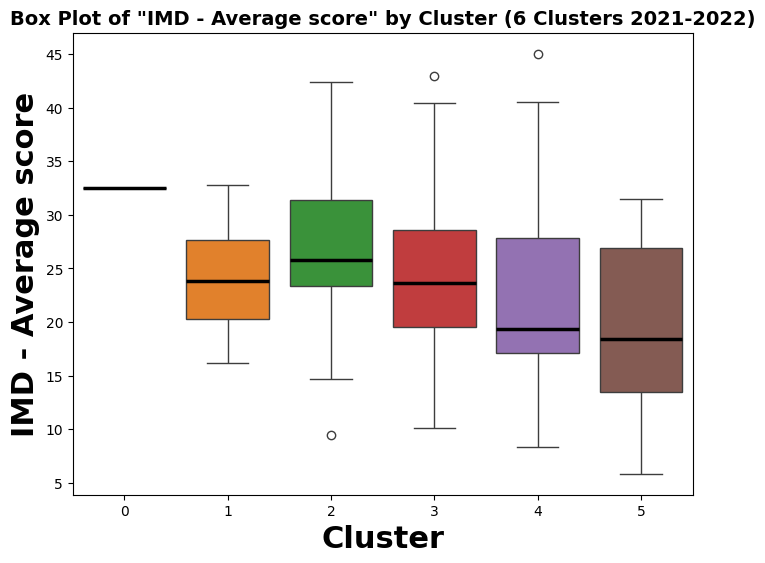

/tmp/ipython-input-1656575755.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster3', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)


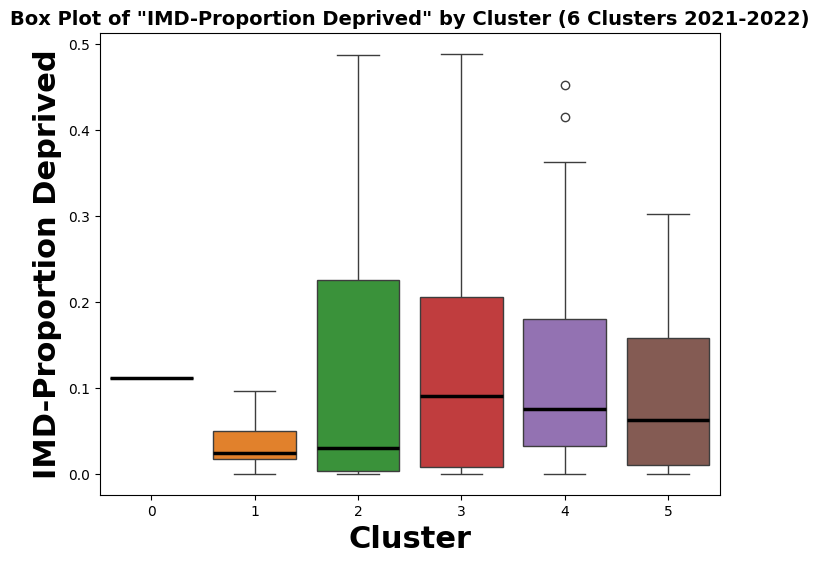

/tmp/ipython-input-1656575755.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster3', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)


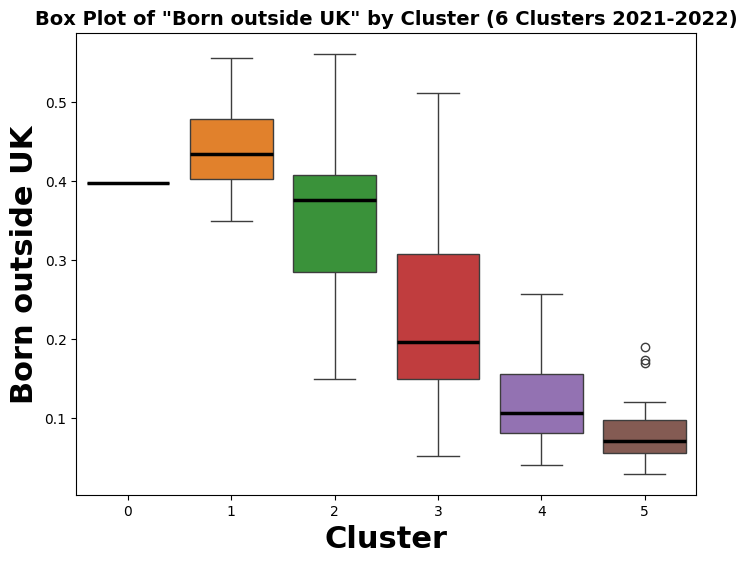

/tmp/ipython-input-1656575755.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster3', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)


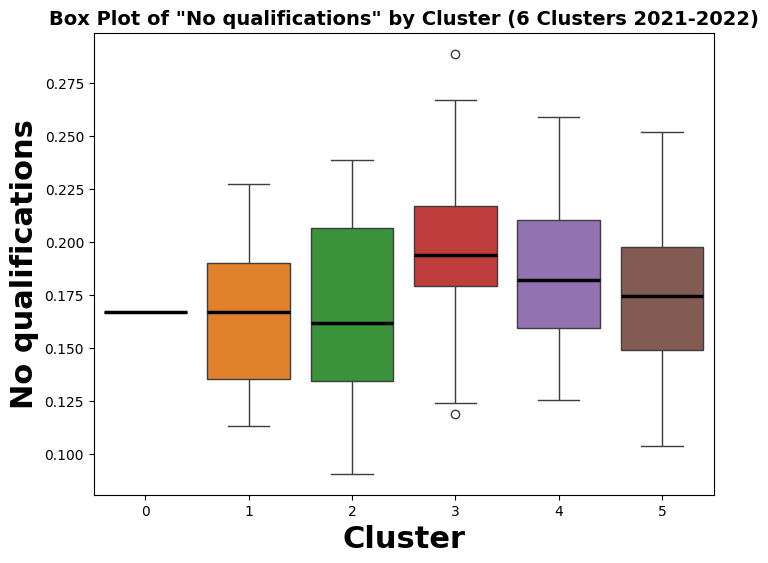

/tmp/ipython-input-1656575755.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster3', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)


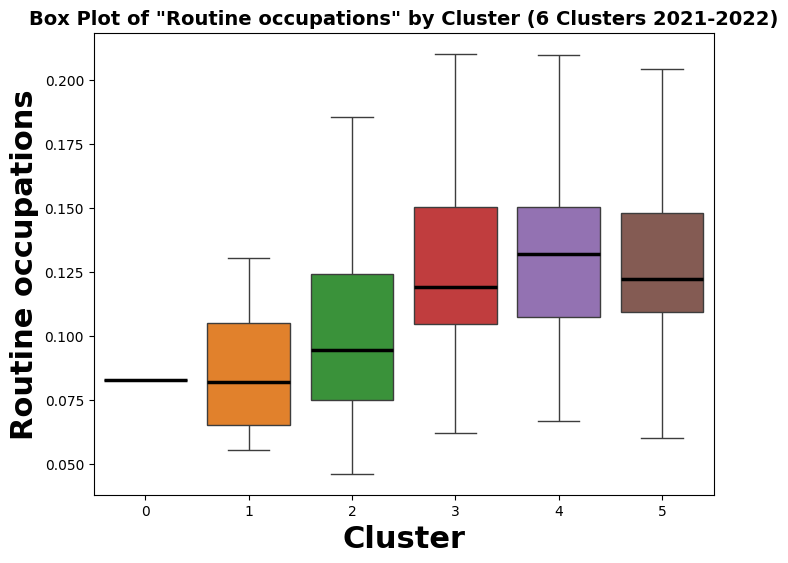

/tmp/ipython-input-1656575755.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster3', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)


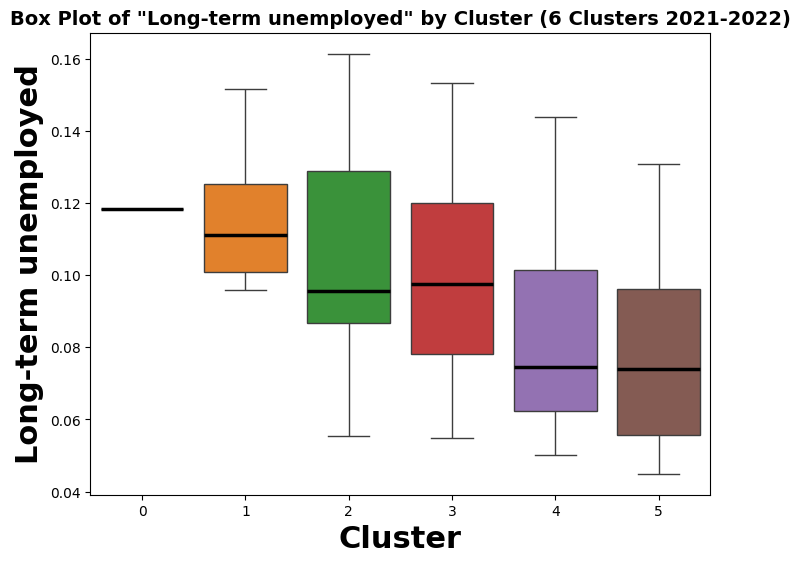

/tmp/ipython-input-1656575755.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster3', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)


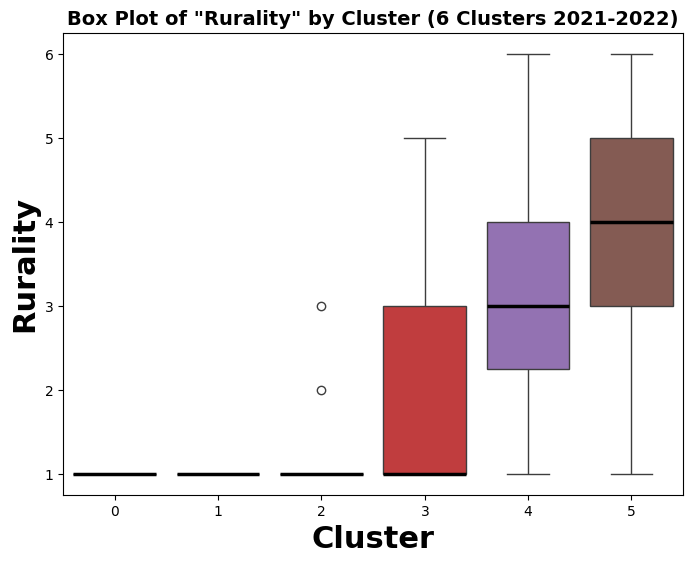

/tmp/ipython-input-1656575755.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster3', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)


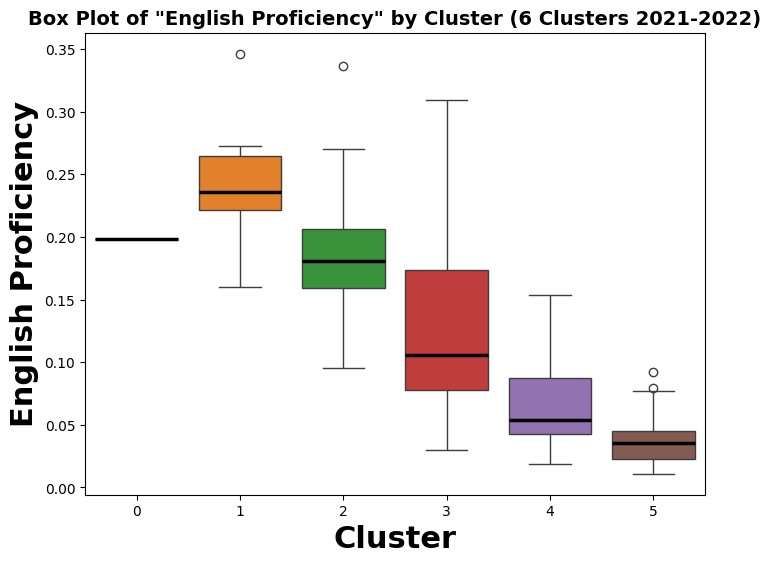

/tmp/ipython-input-1656575755.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster3', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)


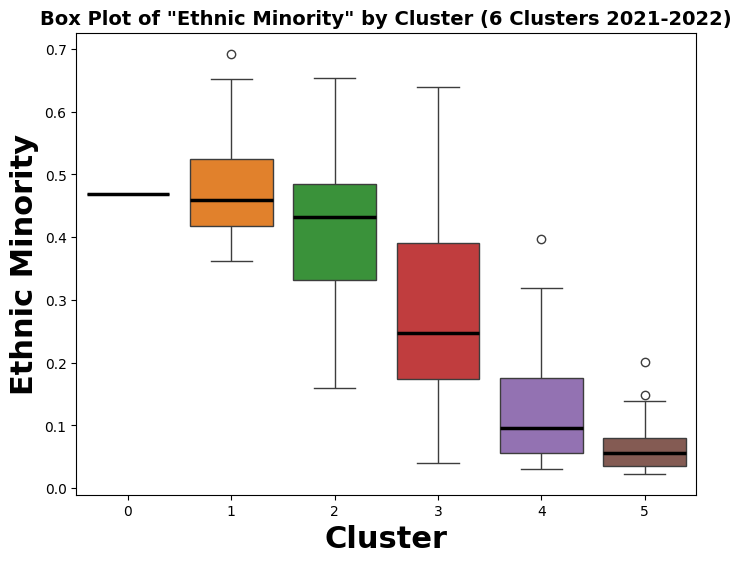

In [210]:
# List of features to create box plots for
features = [
    'IMD - Average score',
    'IMD-Proportion Deprived',
    'Born outside UK',
    'No qualifications',
    'Routine occupations',
    'Long-term unemployed',
    'Rurality',
    'English Proficiency',
    'Ethnic Minority'
]
cluster_palette = {'0': '#1f77b4', '1': '#ff7f0e', '2':'#2ca02c','3':'#d62728', '4':'#9467bd','5':'#8c564b'}

# Loop through each feature and create a box plot
for feature in features:
    plt.figure(figsize=(8, 6))

    # Create the box plot
    sns.boxplot(x='cluster3', y=feature, data=df, medianprops={'color': 'black', 'linewidth': 2.5},palette=cluster_palette)

    # Customize the title and labels
    plt.title(f'Box Plot of "{feature}" by Cluster (6 Clusters 2021-2022)', fontsize=14, fontweight='bold')
    plt.xlabel('Cluster', fontsize=22, fontweight='bold')
    plt.ylabel(feature, fontsize=22, fontweight='bold')

    # Save each plot as an image
    file_name = feature.strip().replace(' ', '_').replace('%', 'Percent').replace('-', '_') + "_box_plot_6_clusters_2021_2022.png"
    plt.savefig(file_name, dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()
